In [1]:
import sys
sys.path.append('../fuzzy-tools') # or just install the module
sys.path.append('../astro-lightcurves-handler') # or just install the module

['id=1000c0', 'id=1000c1', 'id=1001c0', 'id=1001c1', 'id=1002c0', 'id=1002c1', 'id=1003c0', 'id=1003c1', 'id=1004c0', 'id=1004c1', 'id=1005c0', 'id=1005c1'](12#)


c obj_y_pred_c  obj_y_pred_p
ZTF19abpbopt   SLSN         SNIa      0.317975
ZTF19aamrais   SLSN        SNII*      0.492414
ZTF20aawxpru  SNII*        SNIbc      0.432514
ZTF19aayjhpg  SNII*         SLSN      0.493168
ZTF19abcejsg  SNII*         SLSN      0.395339
...             ...          ...           ...
ZTF20aalcyih  SNIbc         SNIa      0.369211
ZTF19aadnxbh  SNIbc         SNIa      0.438295
ZTF19abfsxpw  SNIbc         SNIa      0.485931
ZTF18aaisybp  SNIbc         SNIa      0.340066
ZTF18adasisj  SNIbc         SLSN      0.391856

[114 rows x 3 columns]

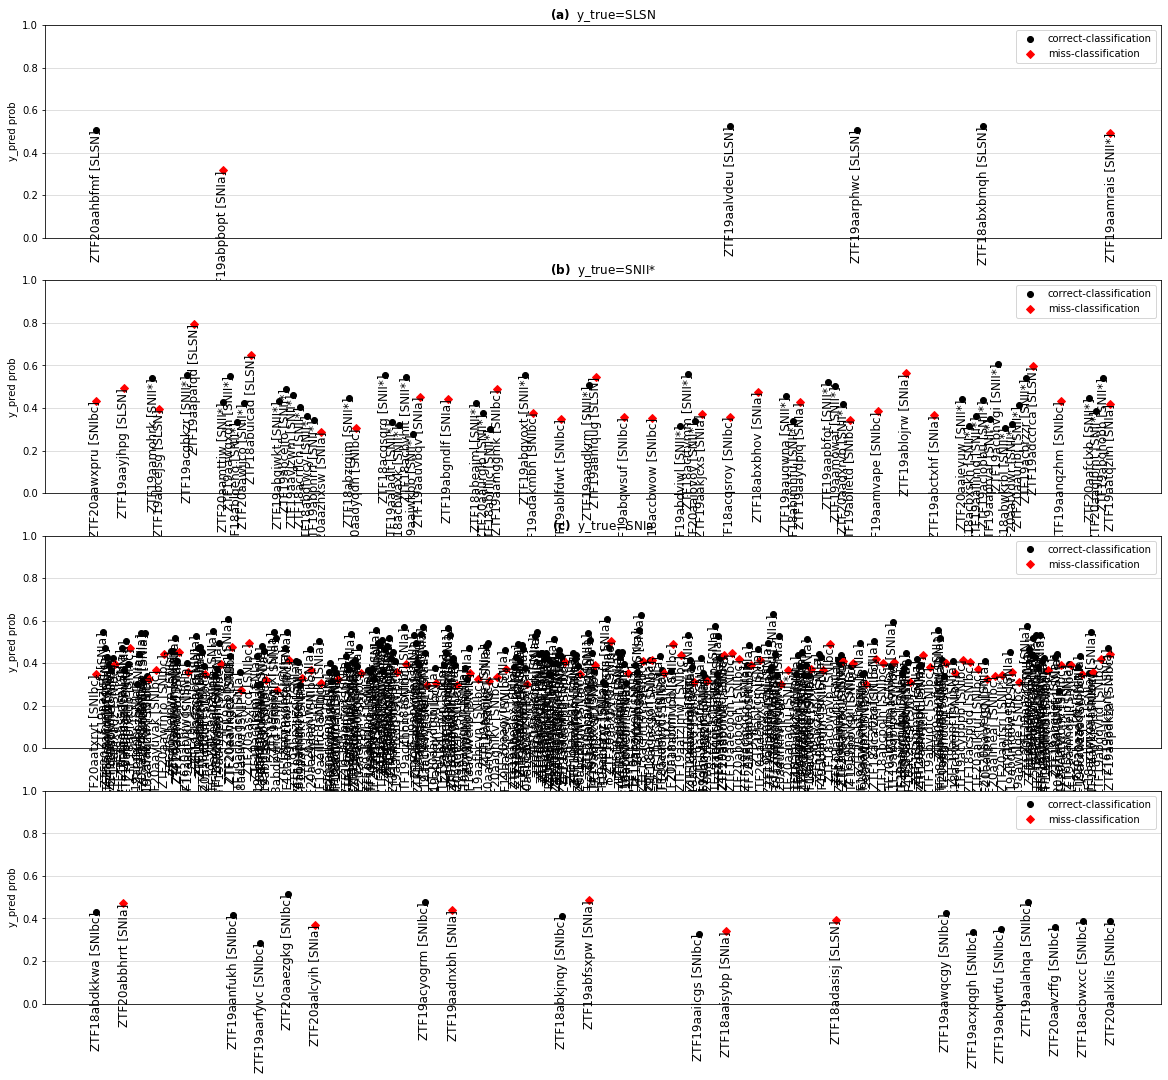

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.files as ftfiles
from fuzzytools.datascience import misclassifications
import matplotlib.pyplot as plt

set_name = 'test'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '1'
mode = 'all'
train_config = 'r'

load_roodir = f'save/method={method}~tmode={train_config}~fmode={mode}/performance/survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
files, files_ids, kfs = ftfiles.gather_files_by_kfold(load_roodir, kf, set_name,
    fext='d',
    imbalanced_kf_mode='ignore', # error oversampling
    )
print(f'{files_ids}({len(files_ids)}#)')

file_idx = 0
file = files[file_idx]
thdays = file()['thdays']
thday = thdays[-1]
days_predictions = file()['thdays_predictions'][thday]
y_pred_p = days_predictions['y_pred_p']
y_true = days_predictions['y_true']
class_names = file()['class_names']
obj_ids = file()['lcobj_names']

fig, axs, brf_miss_objs_df = misclassifications.plot_misclassification_map(y_pred_p, y_true, class_names,
    obj_ids=obj_ids,
    #pred_prob_th=0, # None .5
    fontsize=12,
    figsize=(20,18),
    legend_loc='upper right',
    #verbose=1,
    also_show_correct_objs_txt=True,
    )
display(brf_miss_objs_df)
plt.show()

In [3]:
txt = ''
brf_miss_obj_ids = []
for miss_obj_id in list(brf_miss_objs_df.index):
    txt += f"'{miss_obj_id}', "
    brf_miss_obj_ids += [miss_obj_id]
print(f'brf_miss_obj_ids = [{txt}]')

brf_miss_obj_ids = ['ZTF19abpbopt', 'ZTF19aamrais', 'ZTF20aawxpru', 'ZTF19aayjhpg', 'ZTF19abcejsg', 'ZTF19aapafqd', 'ZTF18abuicad', 'ZTF20aazhxsw', 'ZTF20aadyqdh', 'ZTF19aauvbqv', 'ZTF19abgndlf', 'ZTF19aamggmk', 'ZTF19adakmbh', 'ZTF19ablfdwt', 'ZTF19aanfqug', 'ZTF19abqwsuf', 'ZTF18accbwow', 'ZTF19aakjcxs', 'ZTF18acqsroy', 'ZTF18abxbhov', 'ZTF19aaydpiq', 'ZTF19abiietd', 'ZTF19aamvape', 'ZTF19ablojrw', 'ZTF19abctxhf', 'ZTF19adccrca', 'ZTF19aanqzhm', 'ZTF19aatqzim', 'ZTF20aatxryt', 'ZTF19abixauz', 'ZTF18abixkdo', 'ZTF19aarnqzw', 'ZTF20aayuyak', 'ZTF20aawfnro', 'ZTF19aaywatq', 'ZTF19aaqtyku', 'ZTF20aamdhut', 'ZTF19aamqebl', 'ZTF20aayhacx', 'ZTF18adaslwa', 'ZTF20aasxfcd', 'ZTF19abpnsck', 'ZTF18abdpvnd', 'ZTF18abgmcmv', 'ZTF19aaynskj', 'ZTF20aaewban', 'ZTF19aailltc', 'ZTF19acgqjln', 'ZTF20aaevgyr', 'ZTF19aafmvdb', 'ZTF19acjfhom', 'ZTF19aacivvy', 'ZTF19abjrkqn', 'ZTF20aautzif', 'ZTF18acvwchp', 'ZTF19aathcvn', 'ZTF20aahqcup', 'ZTF20aaghlkv', 'ZTF19aaozpew', 'ZTF20aabcouv', 'ZTF18abuatfp', 'ZTF

In [4]:
"""
copy here the missclassification from another model to compare
be sure that these results also correspond to the same k-fold!!!
"""
deep_miss_obj_ids = ['ZTF19abpbopt', 'ZTF19aapafqd', 'ZTF20aamttiw', 'ZTF18abuicad', 'ZTF19abgiwkt', 'ZTF19abcejfo', 'ZTF20aazhxsw', 'ZTF18abzrgim', 'ZTF18acbwaxk', 'ZTF19aauvbqv', 'ZTF19abgndlf', 'ZTF19aamggmk', 'ZTF19ablfdwt', 'ZTF19aanfqug', 'ZTF19abqwsuf', 'ZTF18accbwow', 'ZTF19abdviwl', 'ZTF19aakjcxs', 'ZTF18abxbhov', 'ZTF19aaydpiq', 'ZTF19abiietd', 'ZTF19aamvape', 'ZTF19ablojrw', 'ZTF19abctxhf', 'ZTF19aaprvar', 'ZTF18abwkrbl', 'ZTF20aatvdwr', 'ZTF19adccrca', 'ZTF19aanqzhm', 'ZTF19aatqzim', 'ZTF20aatxryt', 'ZTF18abixkdo', 'ZTF20abffaxl', 'ZTF20aayuyak', 'ZTF20aawfnro', 'ZTF19aaywatq', 'ZTF20aayhacx', 'ZTF20aasxfcd', 'ZTF19abkgbul', 'ZTF19aailltc', 'ZTF18acbufud', 'ZTF19acmdpyr', 'ZTF20aafxrcv', 'ZTF19abdyawn', 'ZTF20abavxpk', 'ZTF18abuatfp', 'ZTF20abaunmw', 'ZTF19adbsciy', 'ZTF19abpveqn', 'ZTF20aambbfn', 'ZTF19abzrjrg', 'ZTF19aavoiyc', 'ZTF19aaeopqn', 'ZTF20abgbdeh', 'ZTF20aayqjpv', 'ZTF20aanadlu', 'ZTF18acdwohd', 'ZTF18acbwavp', 'ZTF20abfhway', 'ZTF20aaqpxtm', 'ZTF19aajxwnz', 'ZTF18acafztq', 'ZTF18abcpolh', 'ZTF19ablusdf', 'ZTF19aawtnqd', 'ZTF19acypppb', 'ZTF20aalmeaj', 'ZTF20aazpnxl', 'ZTF18aaykjei', 'ZTF19abqqvhd', 'ZTF19aarfyvc', 'ZTF18aaisybp', 'ZTF18adasisj', 'ZTF19acxpqgh', 'ZTF19abqwtfu', 'ZTF20aalxlis', ]


In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.progress_bars import ProgressBar
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

filedir = f'../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset:
[outliers; samples 4]
(.) obs_samples=289; min_len=14; max_dur=408.0[days]; dur(p50)=222.1[days]; cadence(p50)=0.9[days]
(g) obs_samples=144; min_len=6; tmax=44.923828125; max_dur=408.0 [days]; dur(p50)=222.0 [days]; cadence(p50)=1.9 [days]
(r) obs_samples=145; min_len=8; tmax=212.09375; max_dur=376.0 [days]; dur(p50)=220.4 [days]; cadence(p50)=2.0 [days]
   |██      | SLSN - 1/4 (25.00%)
   |████    | SNII* - 2/4 (50.00%)
   |██      | SNIa - 1/4 (25.00%)
   |        | SNIbc - 0/4 (0.00%)
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[faint; samples 0]
empty lcset
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
#obs=37.
#obs=34.
ZTF20aaghlkv


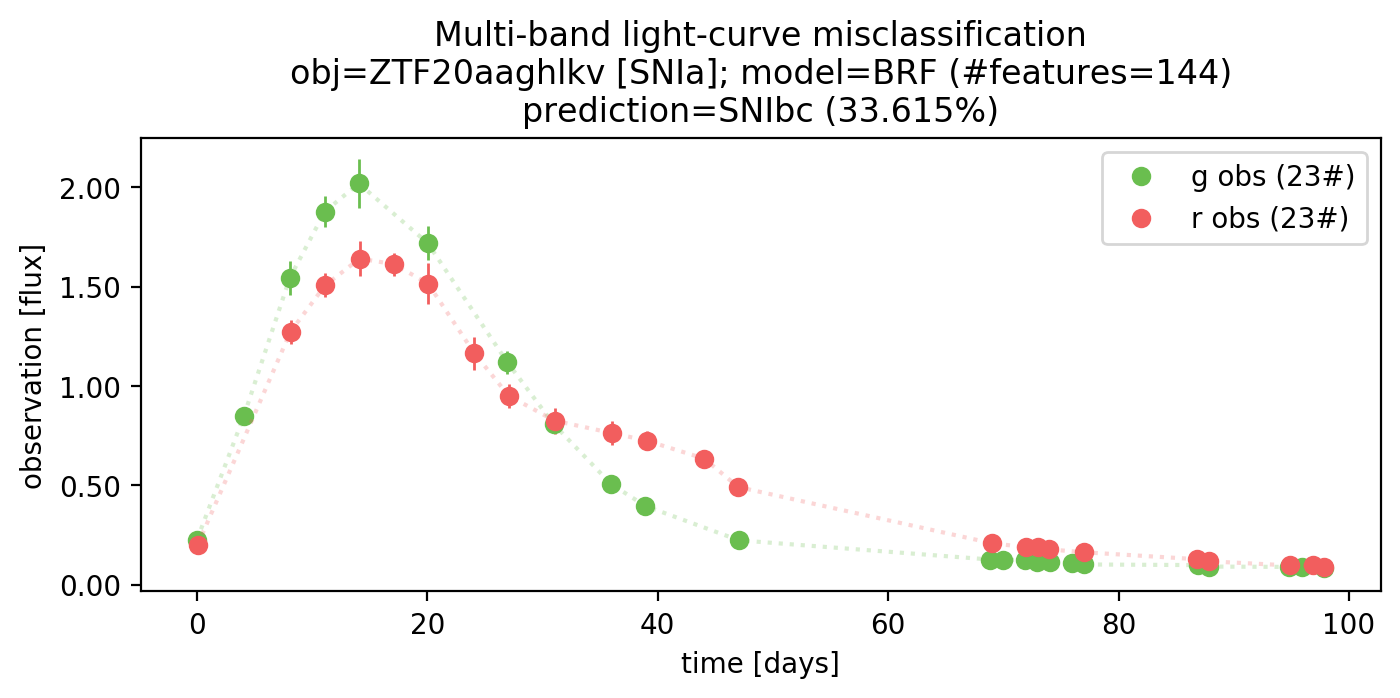

#obs=5.
#obs=7.
ZTF19abixauz


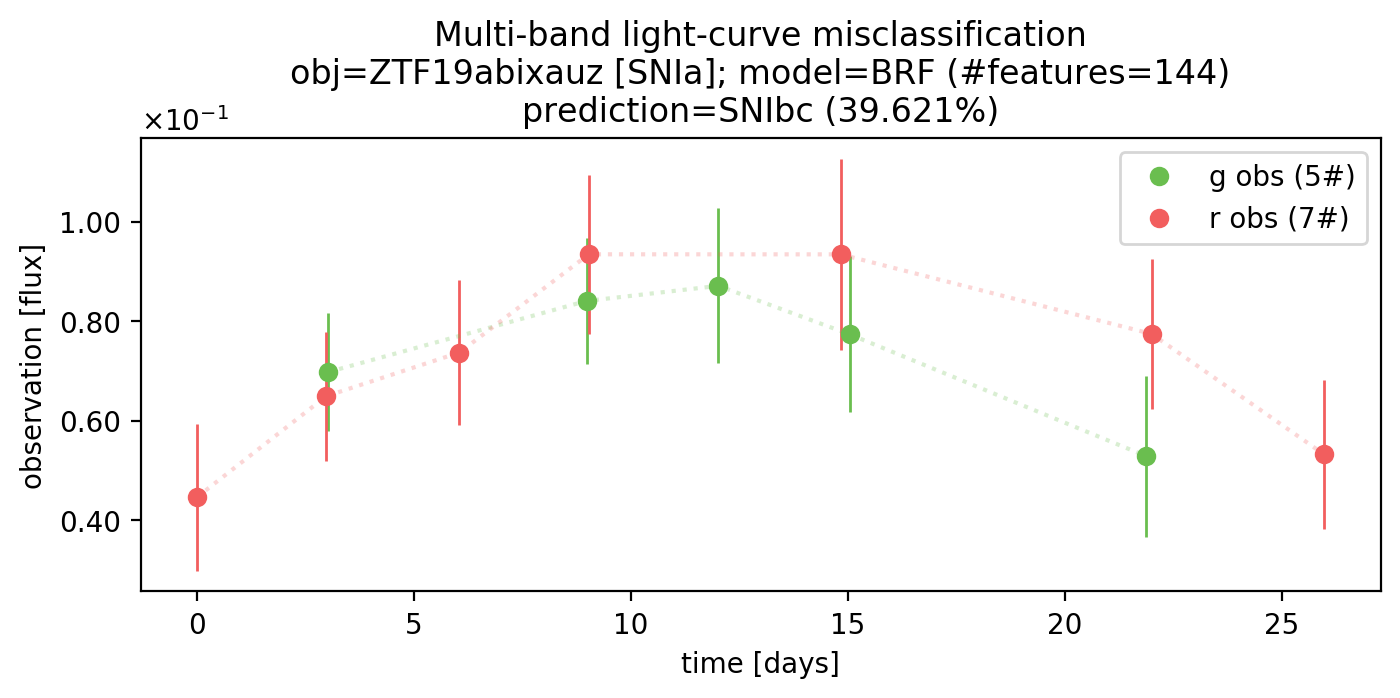

#obs=3.
#obs=6.
ZTF20aaporoa


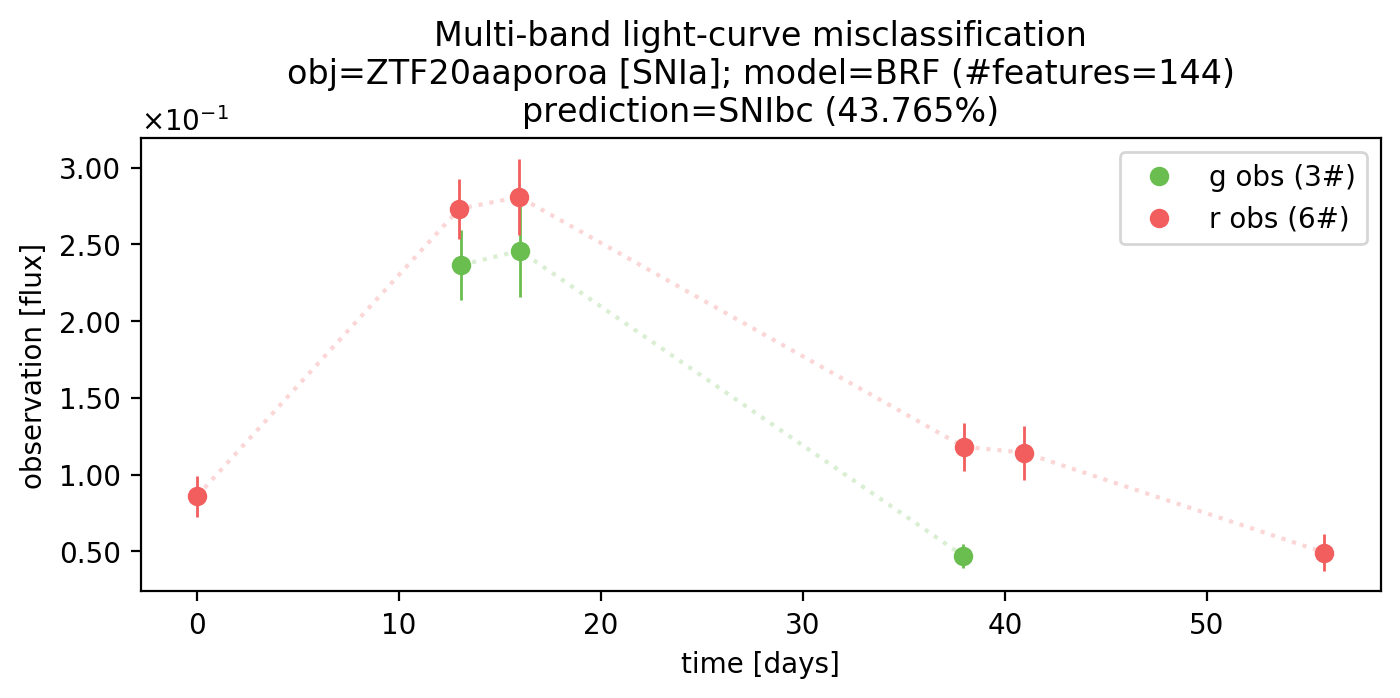

#obs=4.
#obs=9.
ZTF19acjfhom


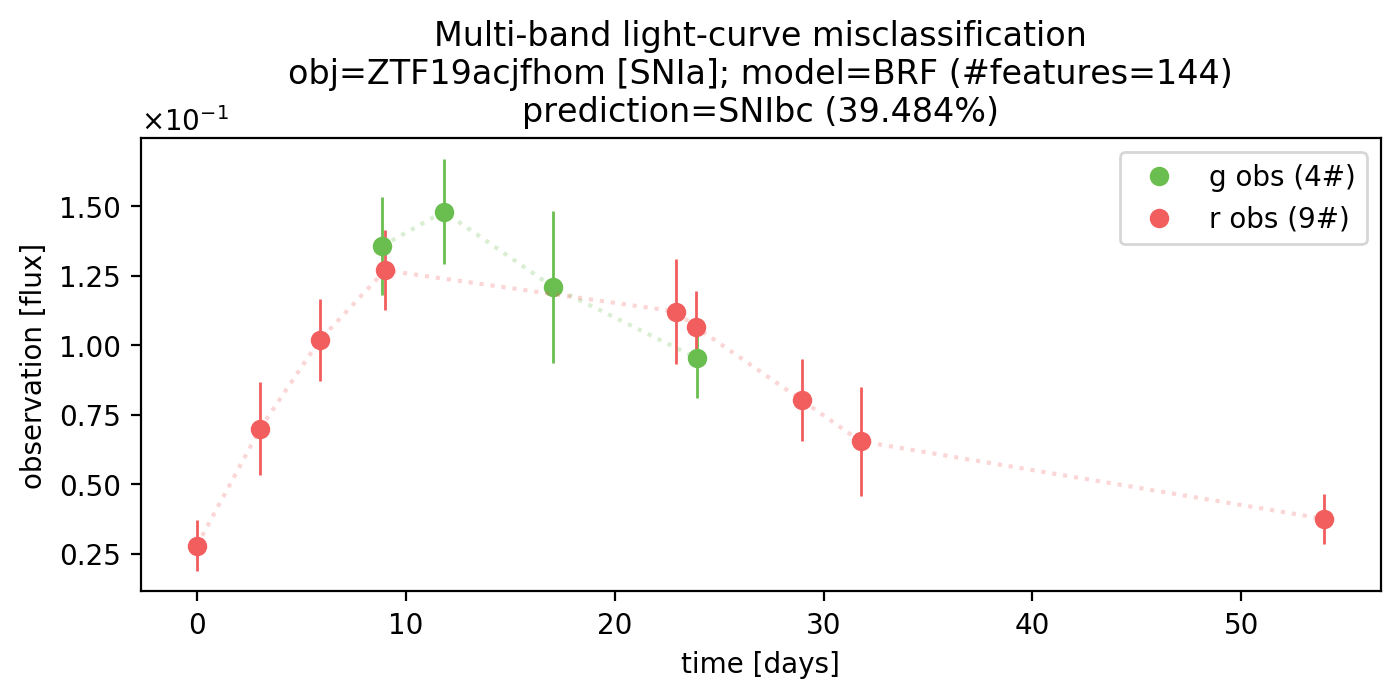

#obs=6.
#obs=4.
ZTF19aaynskj


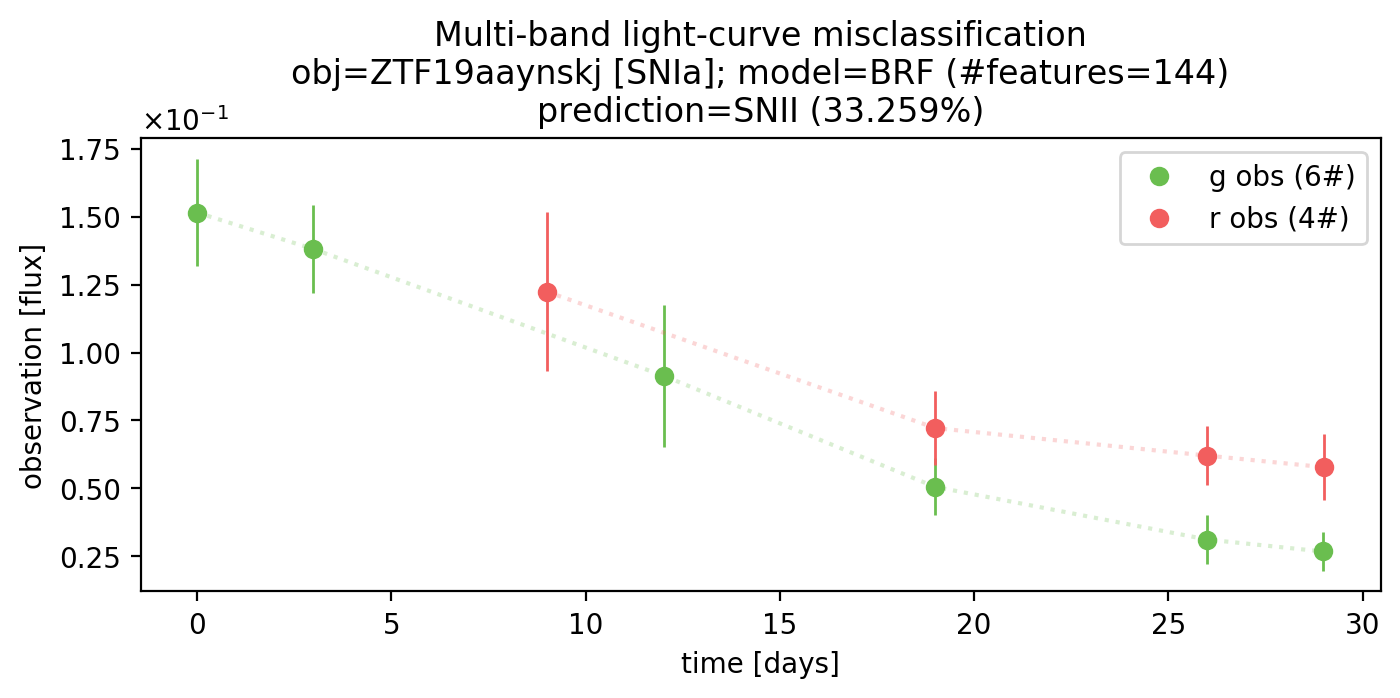

#obs=37.
#obs=36.
ZTF18aasdted


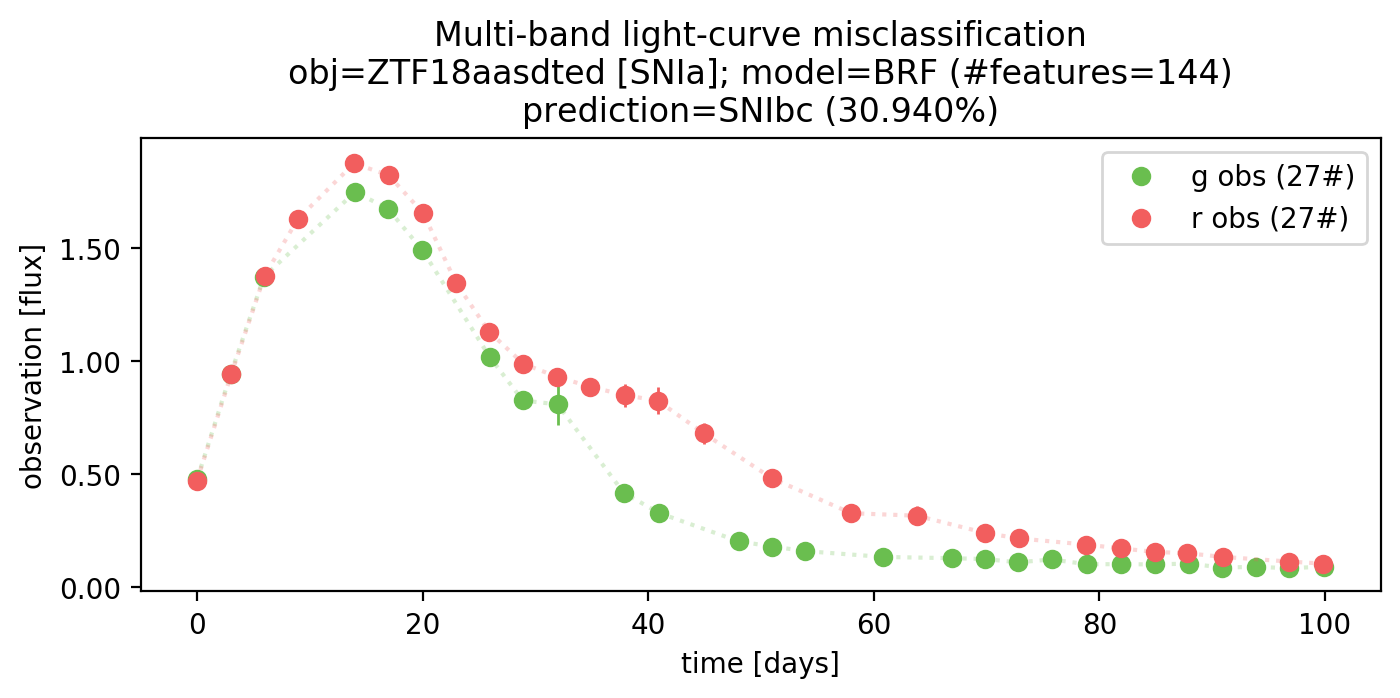

#obs=10.
#obs=12.
ZTF19abpnsck


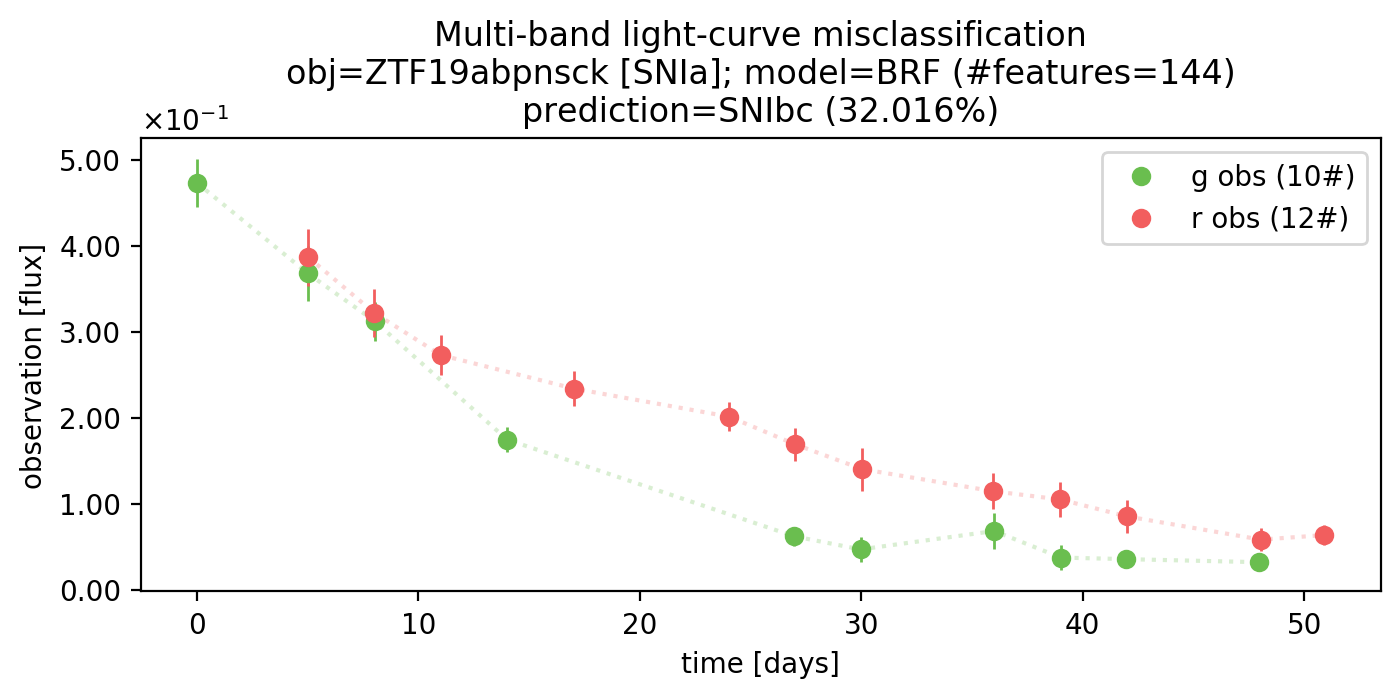

#obs=8.
#obs=13.
ZTF18acvwchp


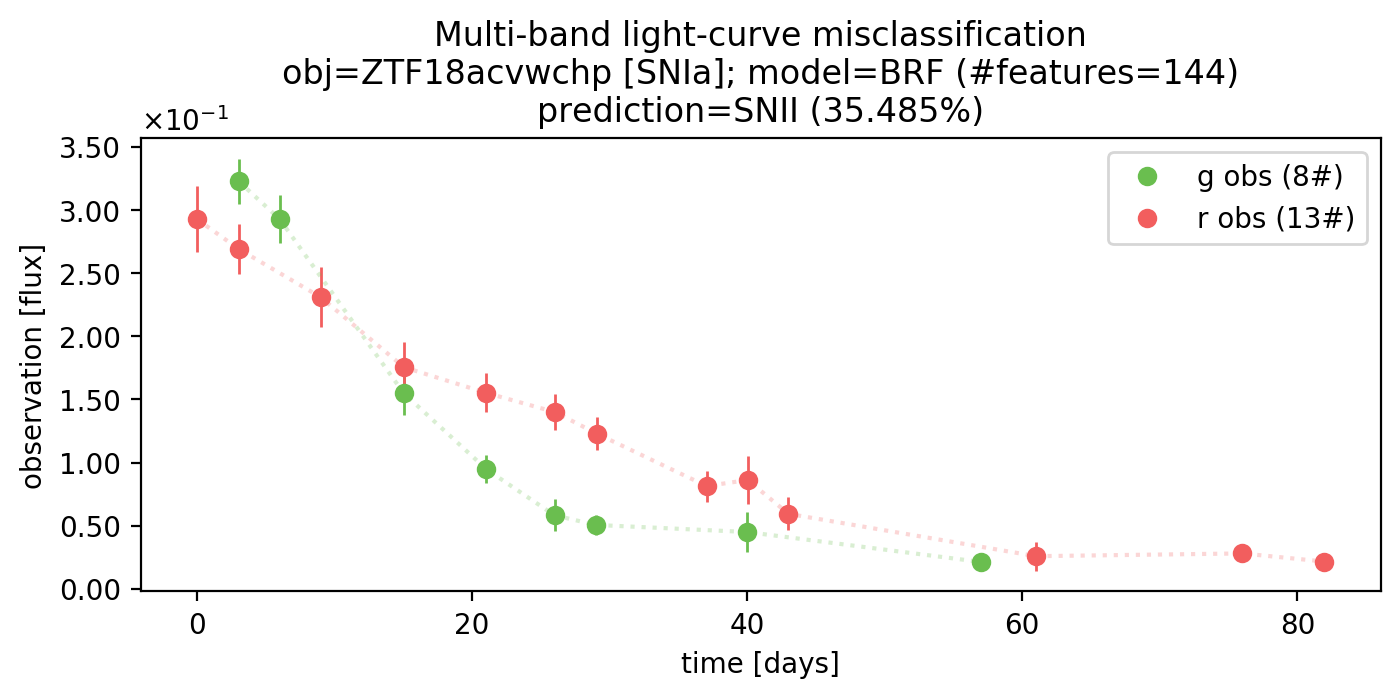

#obs=17.
#obs=21.
ZTF19aathcvn


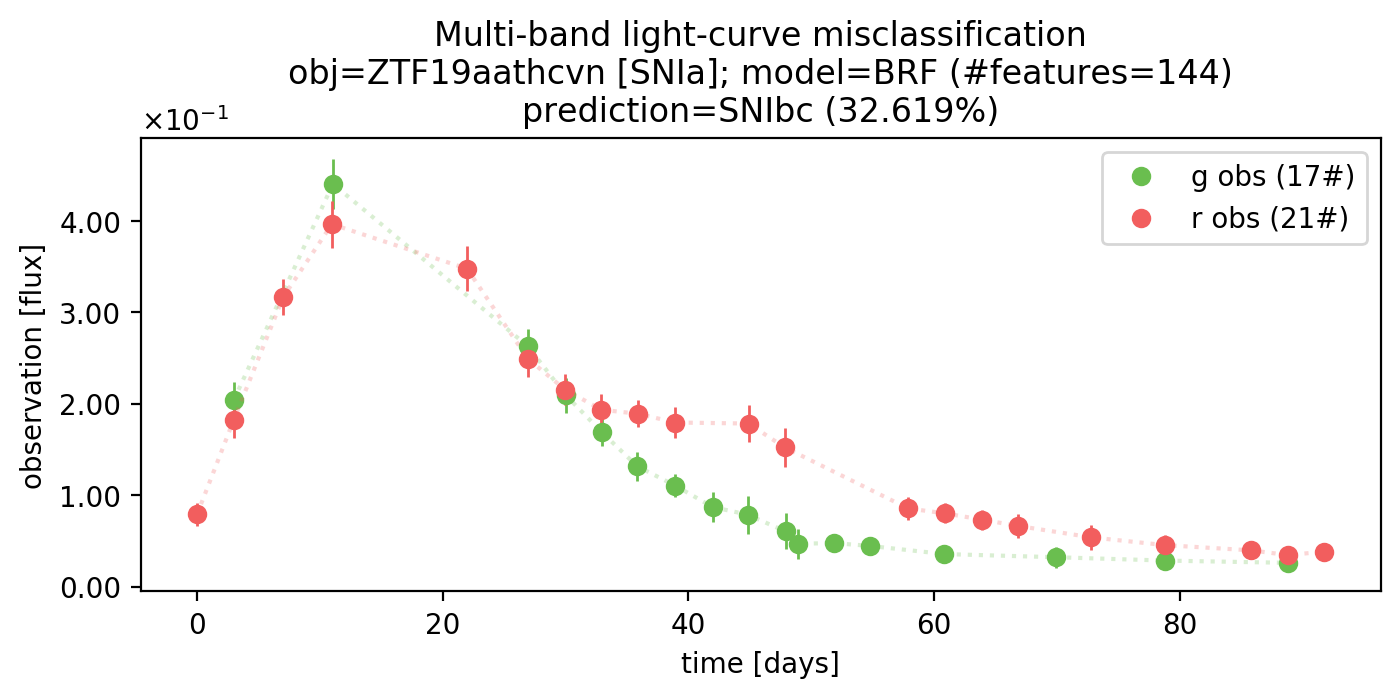

#obs=0.
#obs=30.
ZTF19abpbvsk


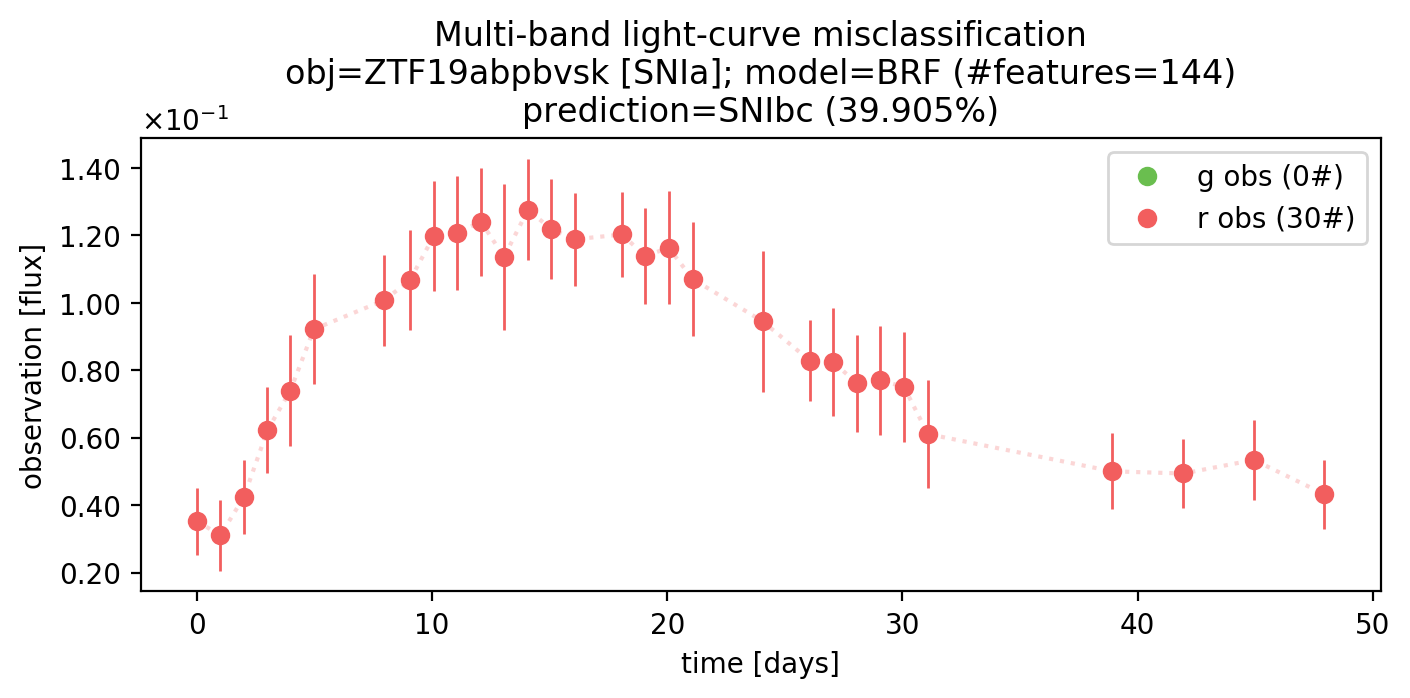

#obs=4.
#obs=7.
ZTF20aadcbux


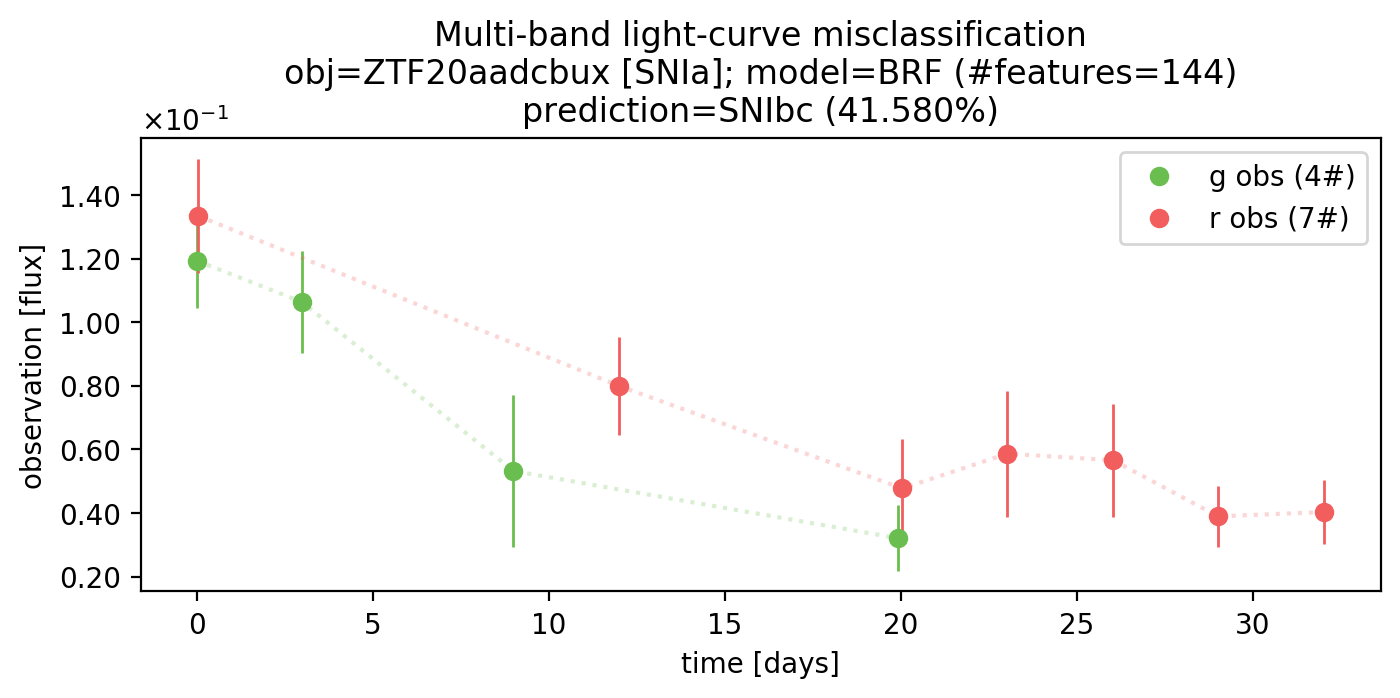

#obs=28.
#obs=27.
ZTF19acgqjln


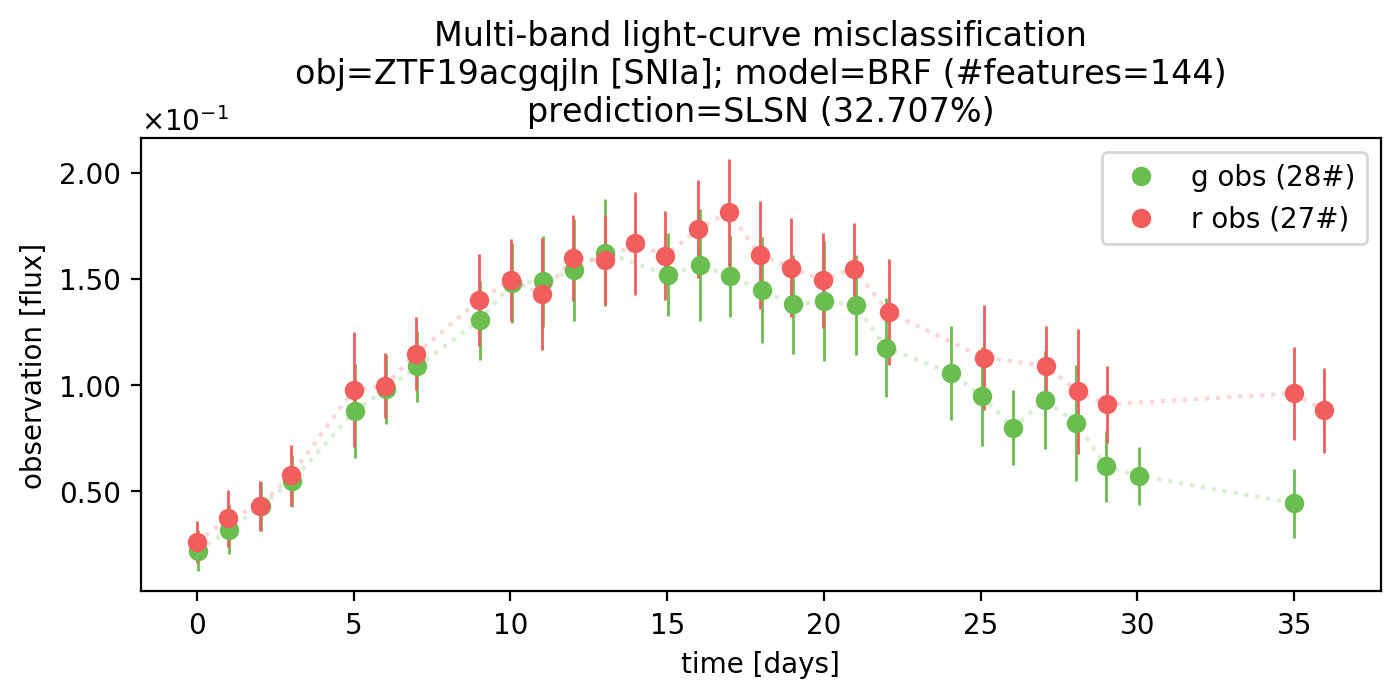

#obs=3.
#obs=9.
ZTF18acpscso


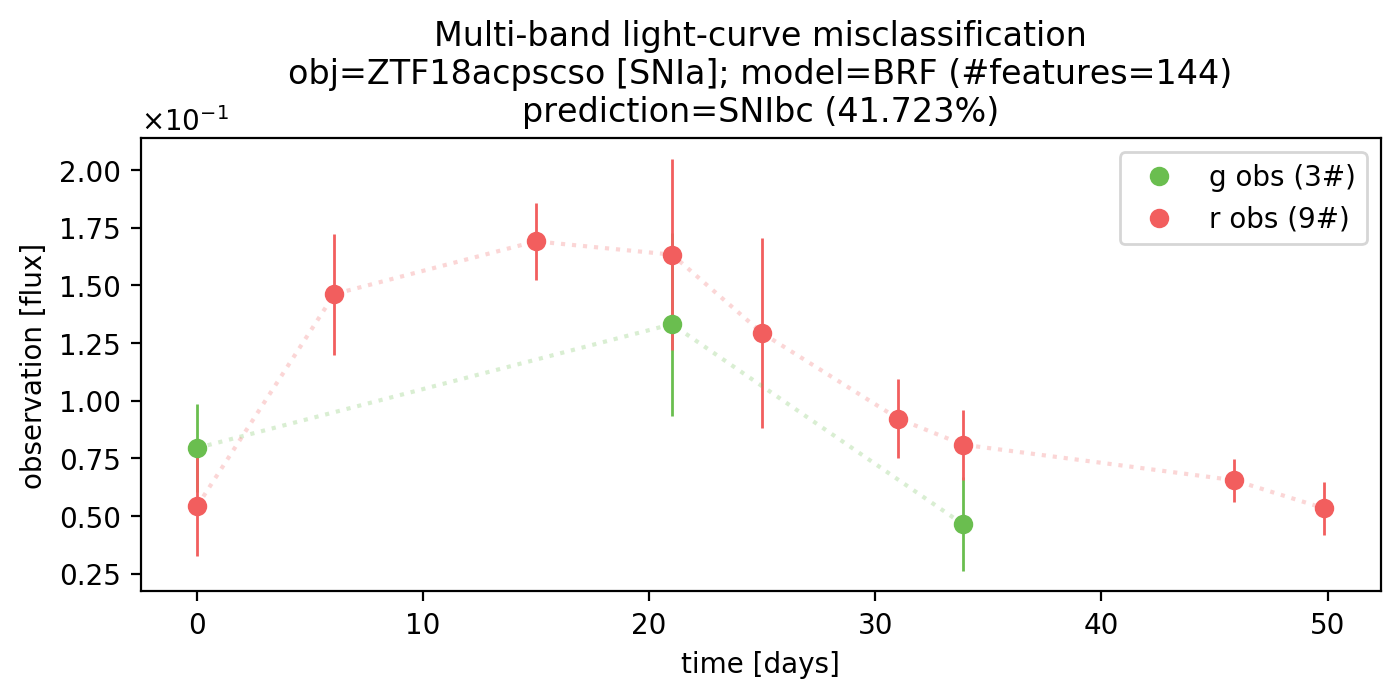

#obs=6.
#obs=5.
ZTF20aaifsri


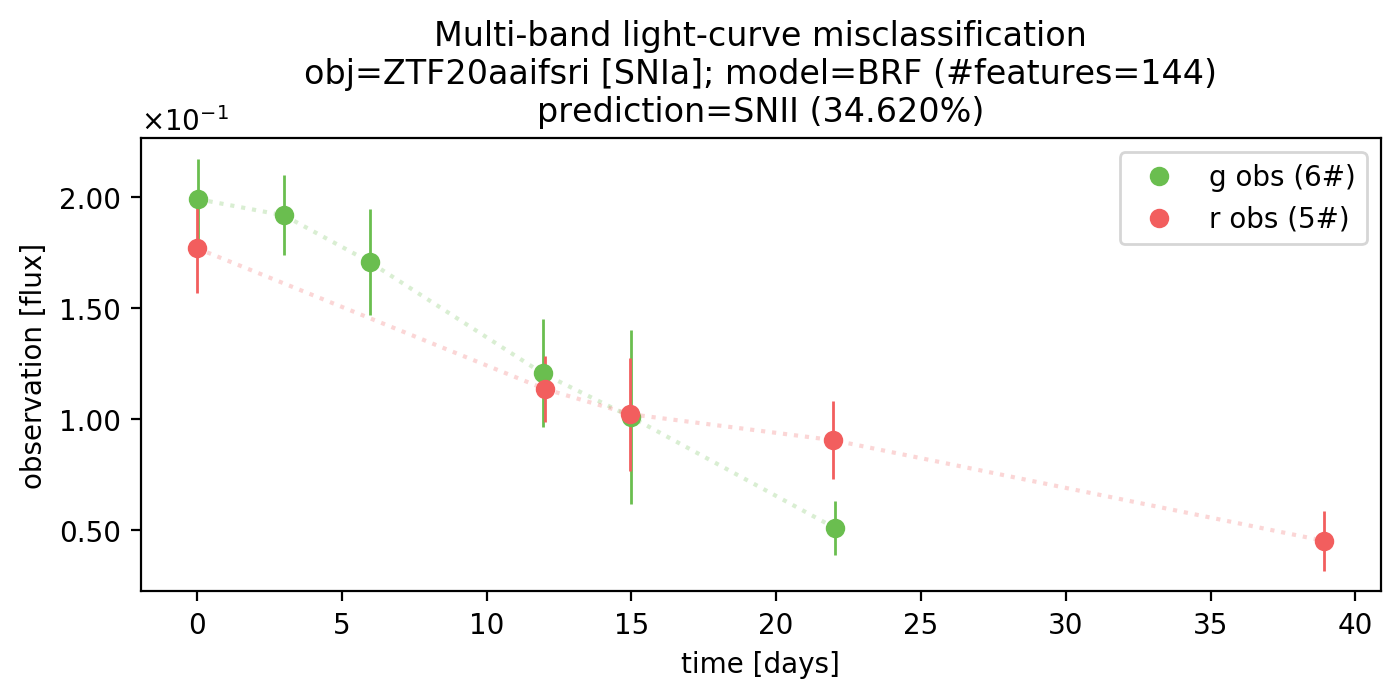

#obs=24.
#obs=29.
ZTF18abdpvnd


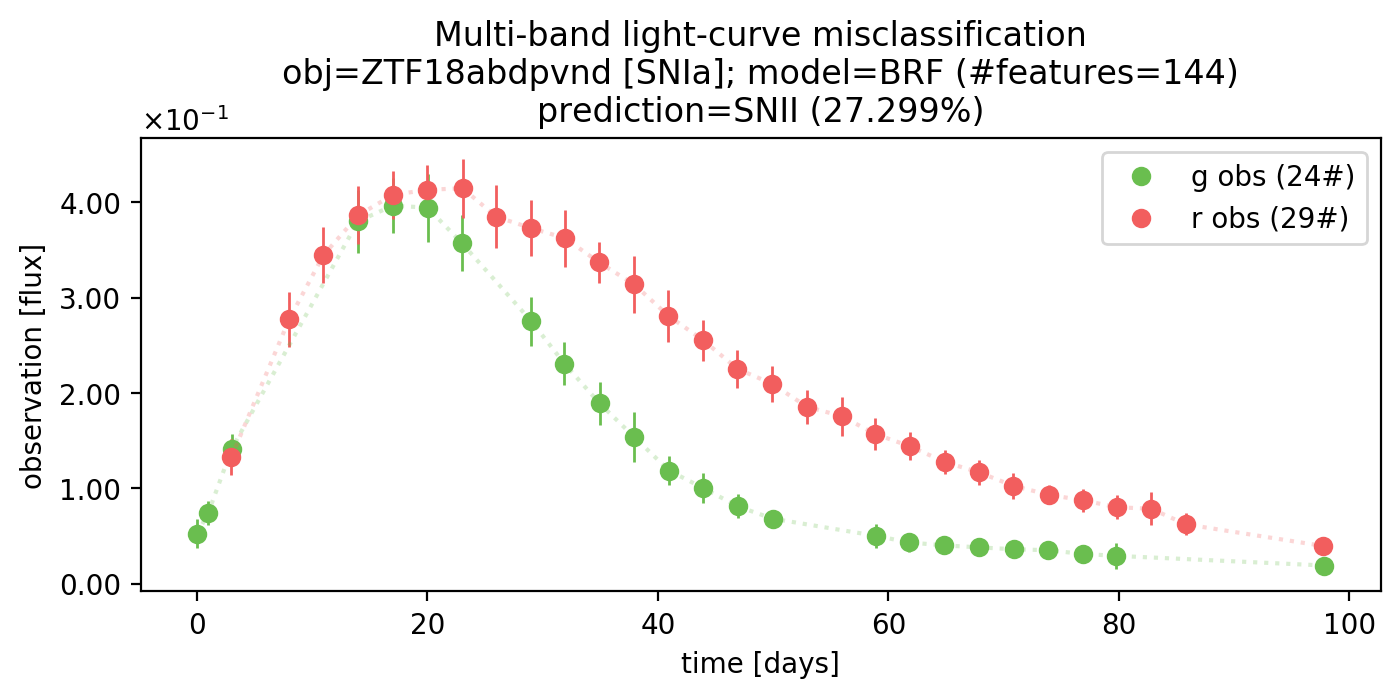

#obs=9.
#obs=12.
ZTF19aayjhpg


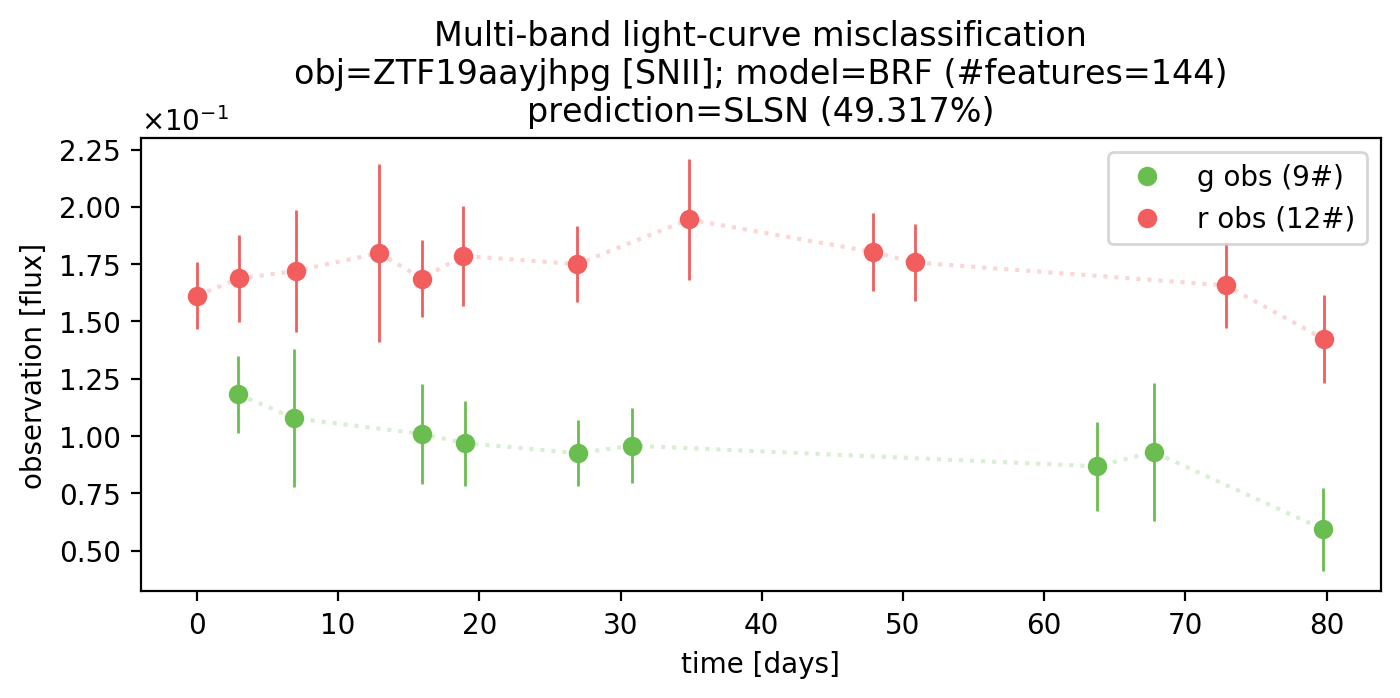

#obs=49.
#obs=29.
ZTF19abxjimu


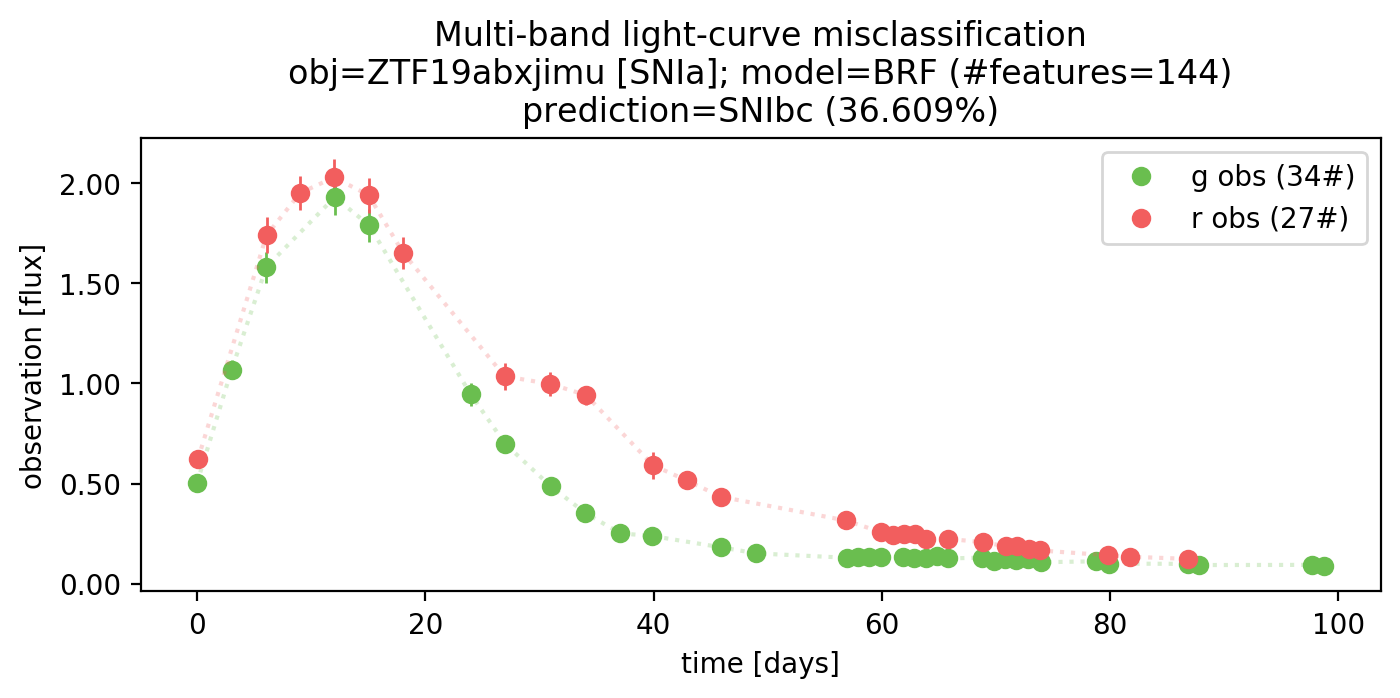

#obs=6.
#obs=15.
ZTF18acusbyf


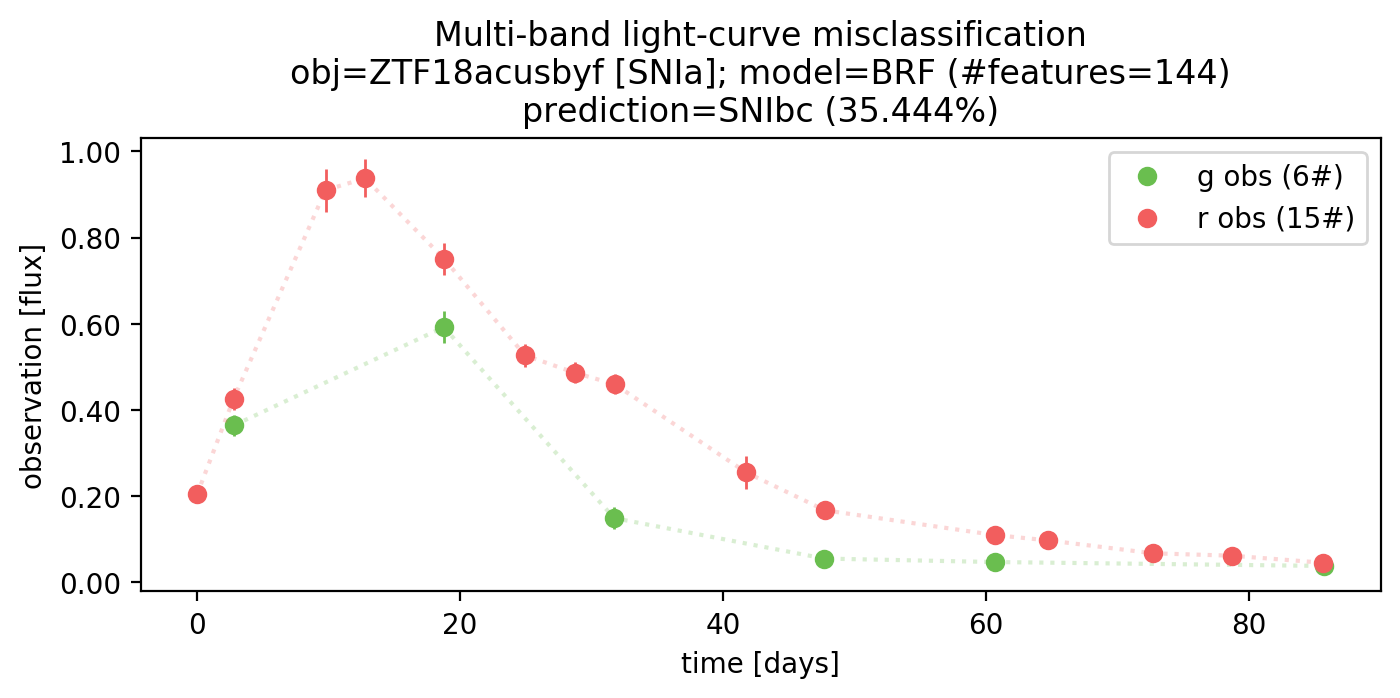

#obs=4.
#obs=11.
ZTF20aaevgyr


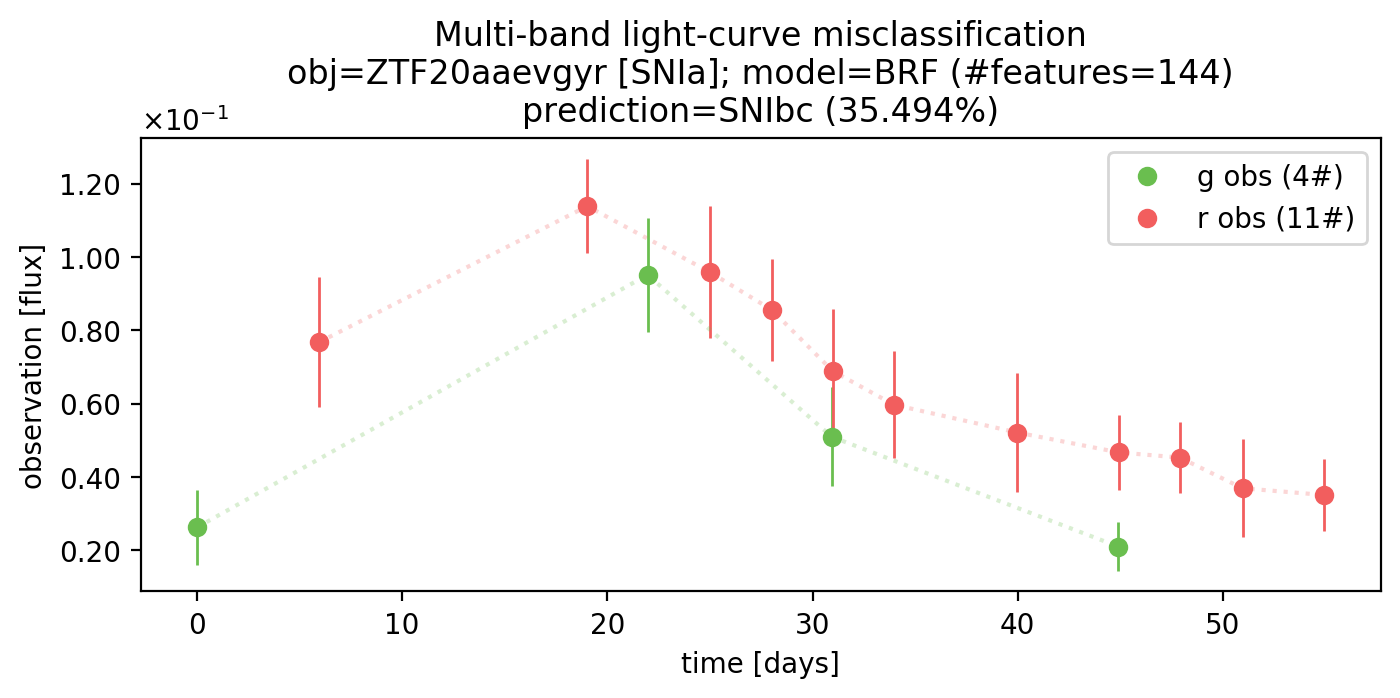

#obs=22.
#obs=28.
ZTF19aaqtyku


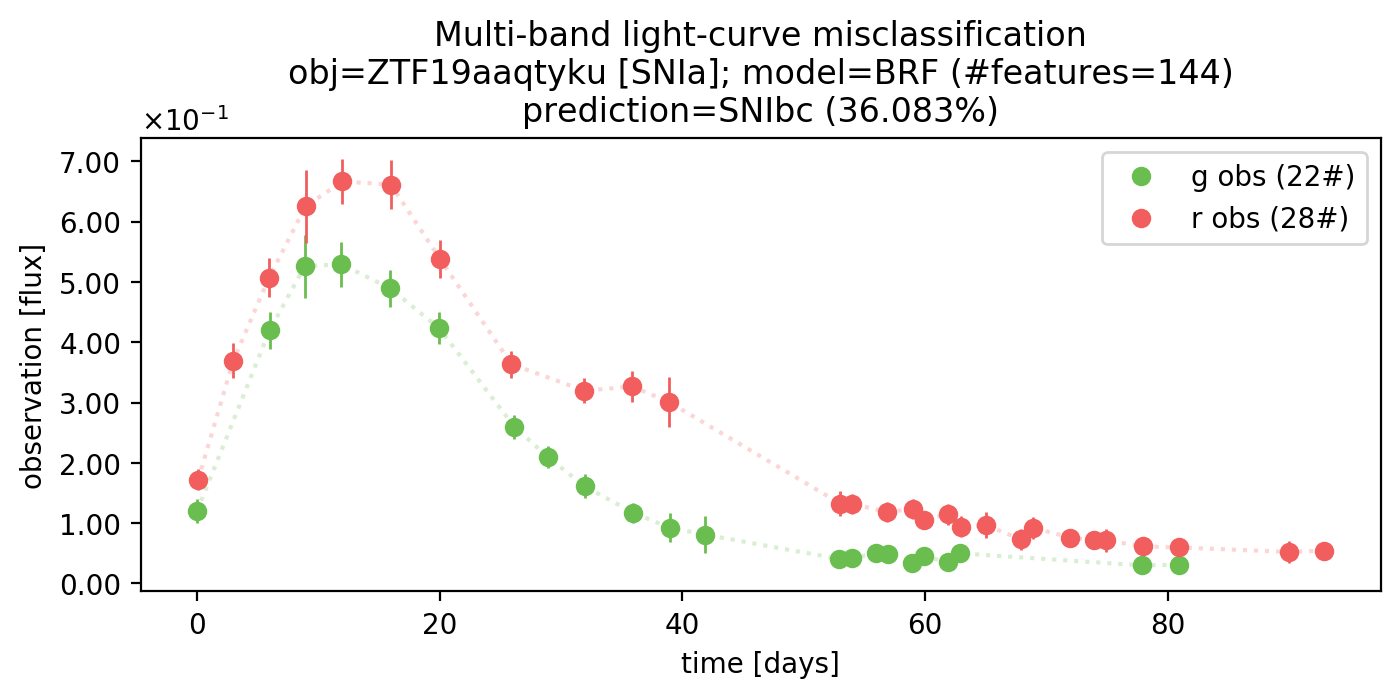

#obs=50.
#obs=26.
ZTF19aamhqej


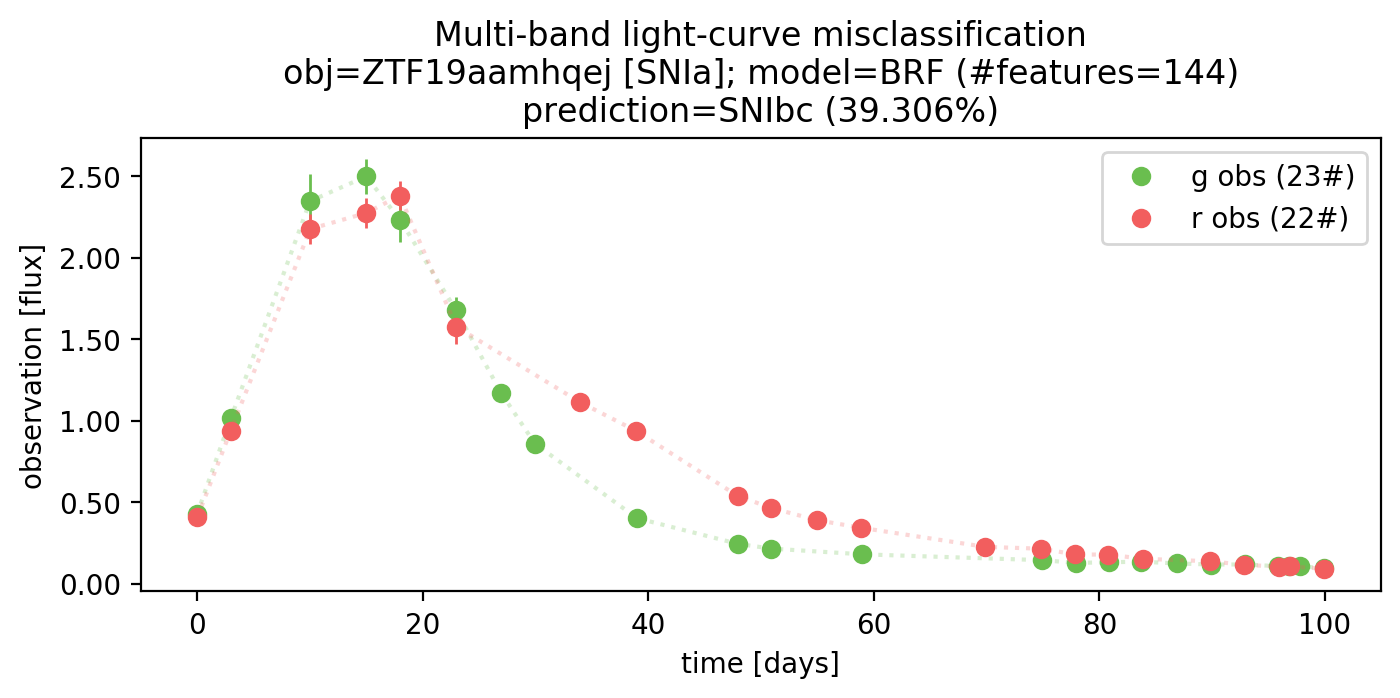

#obs=5.
#obs=7.
ZTF20aaifyfx


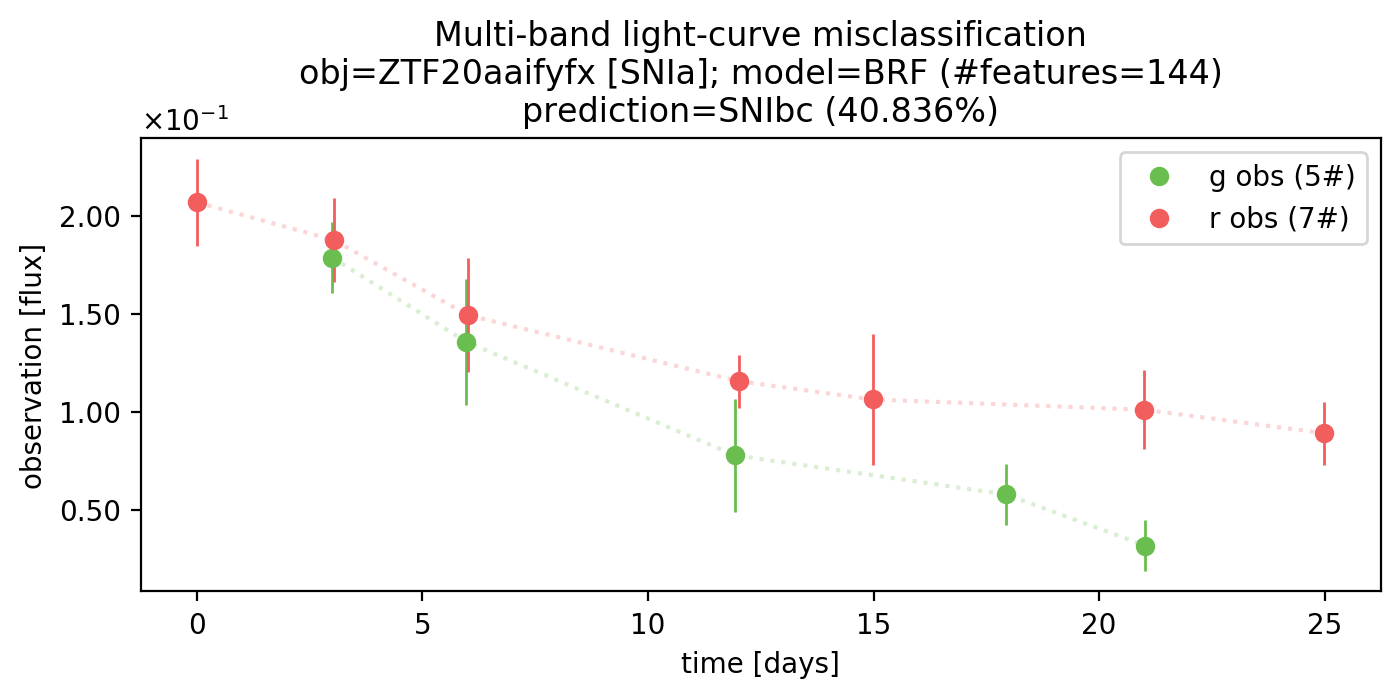

#obs=25.
#obs=35.
ZTF19aamrais


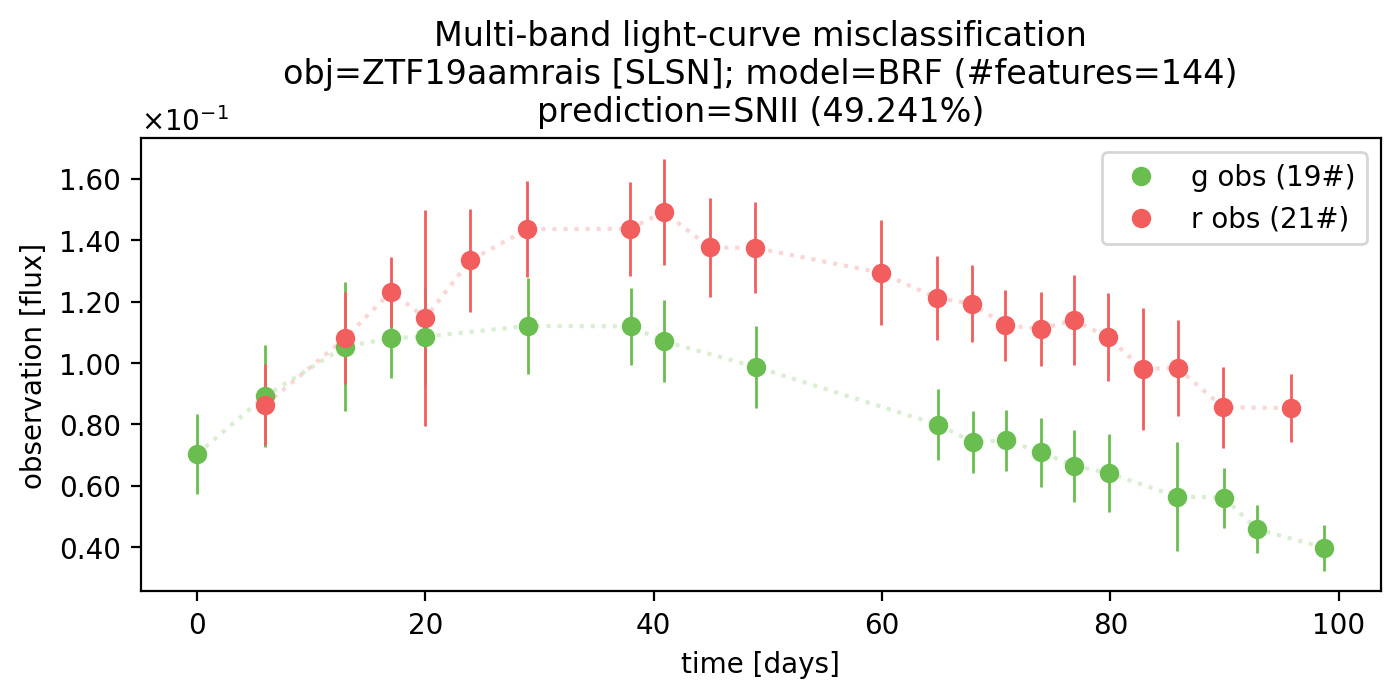

#obs=7.
#obs=4.
ZTF19aadnxbh


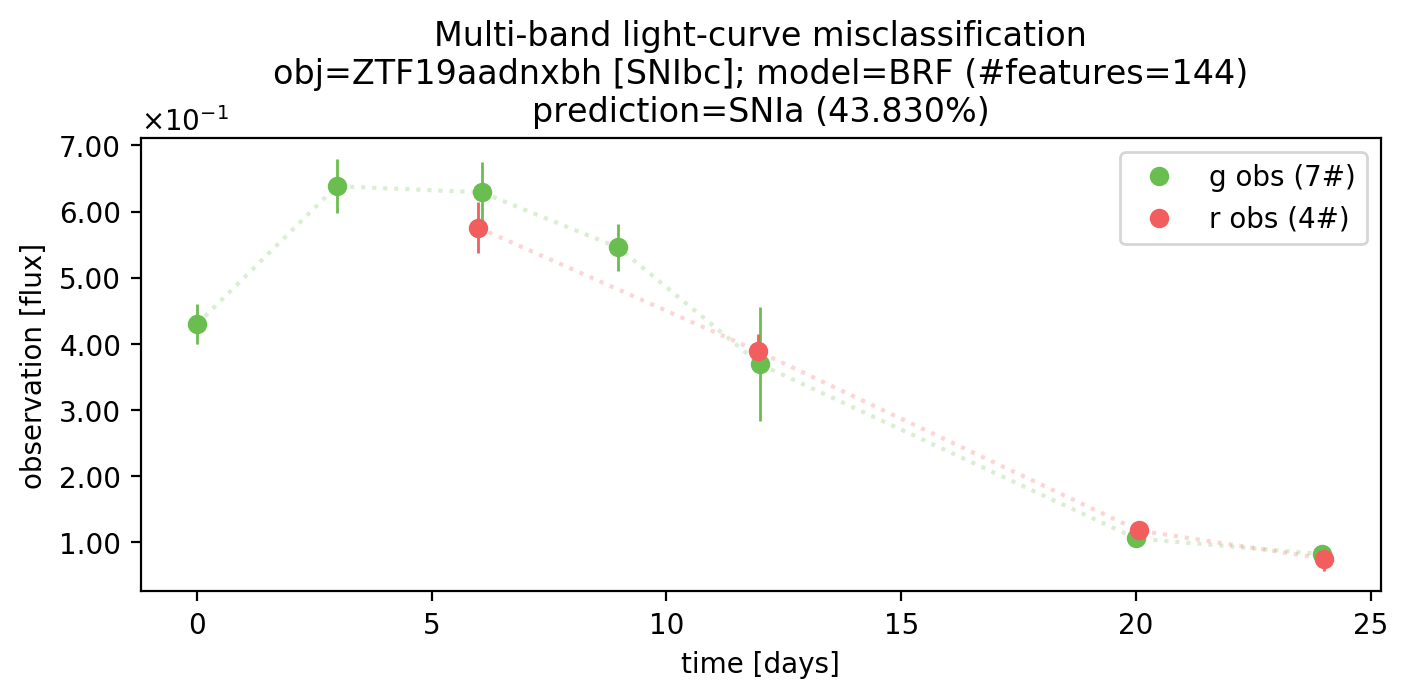

#obs=4.
#obs=8.
ZTF19abvjdfc


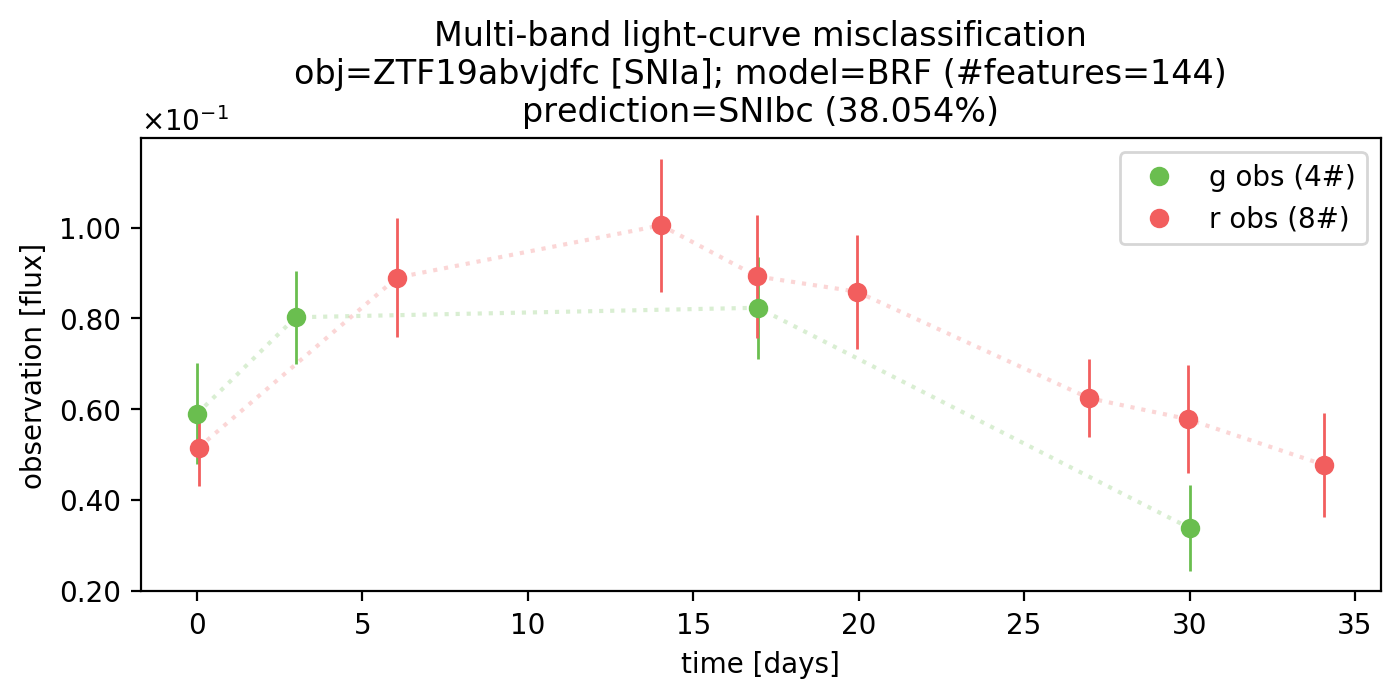

#obs=6.
#obs=13.
ZTF20aawxpru


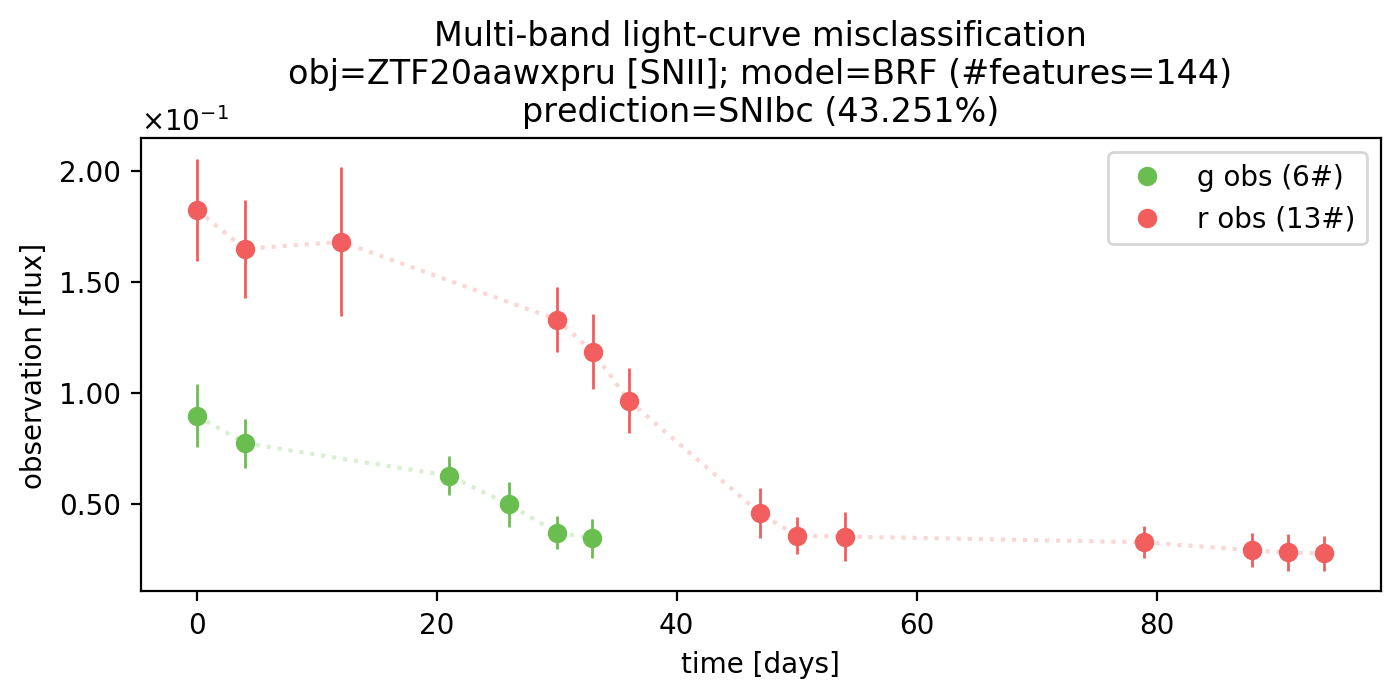

#obs=11.
#obs=17.
ZTF20aahqcup


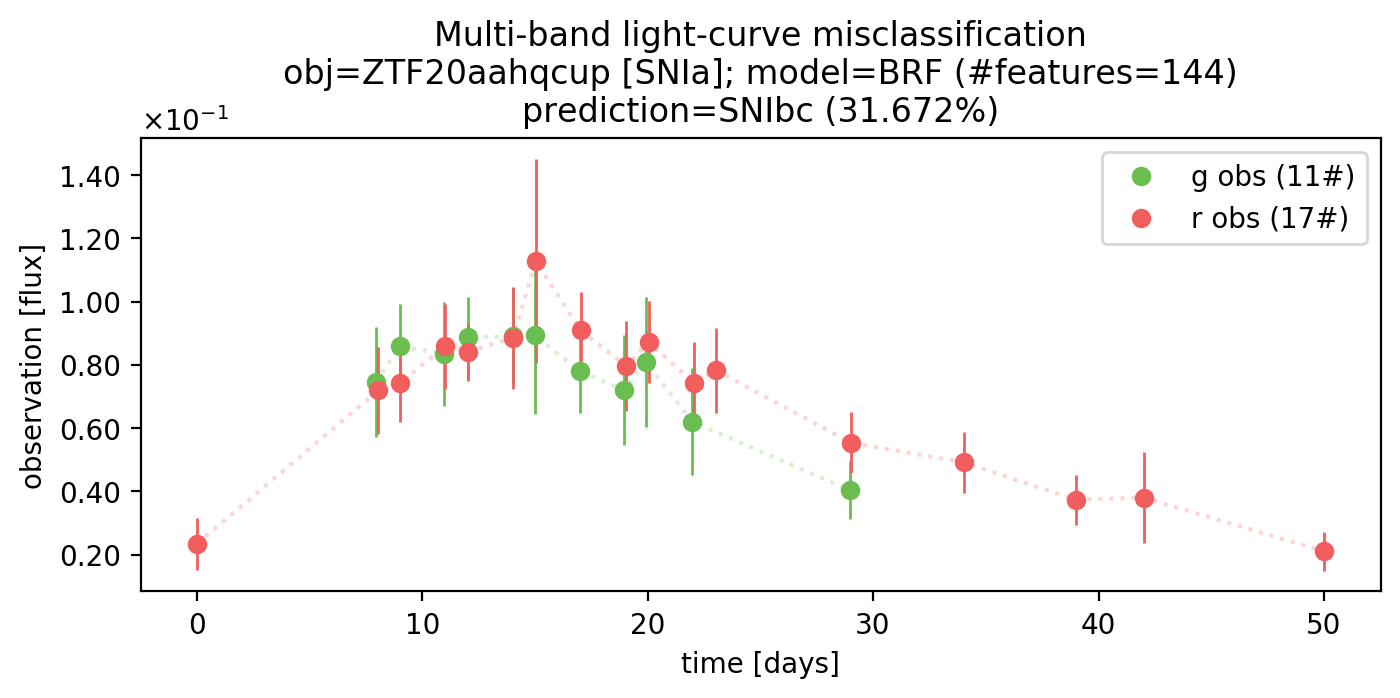

#obs=18.
#obs=14.
ZTF19aaozpew


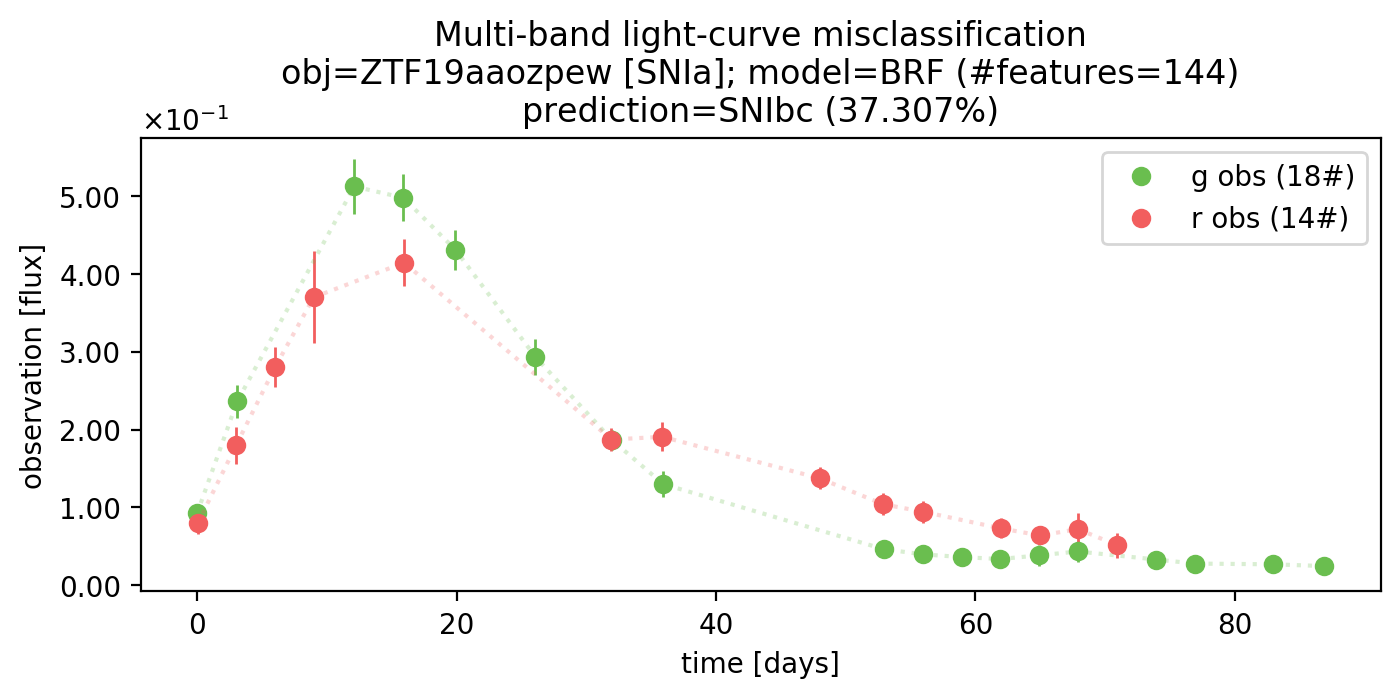

#obs=7.
#obs=11.
ZTF20aatwonv


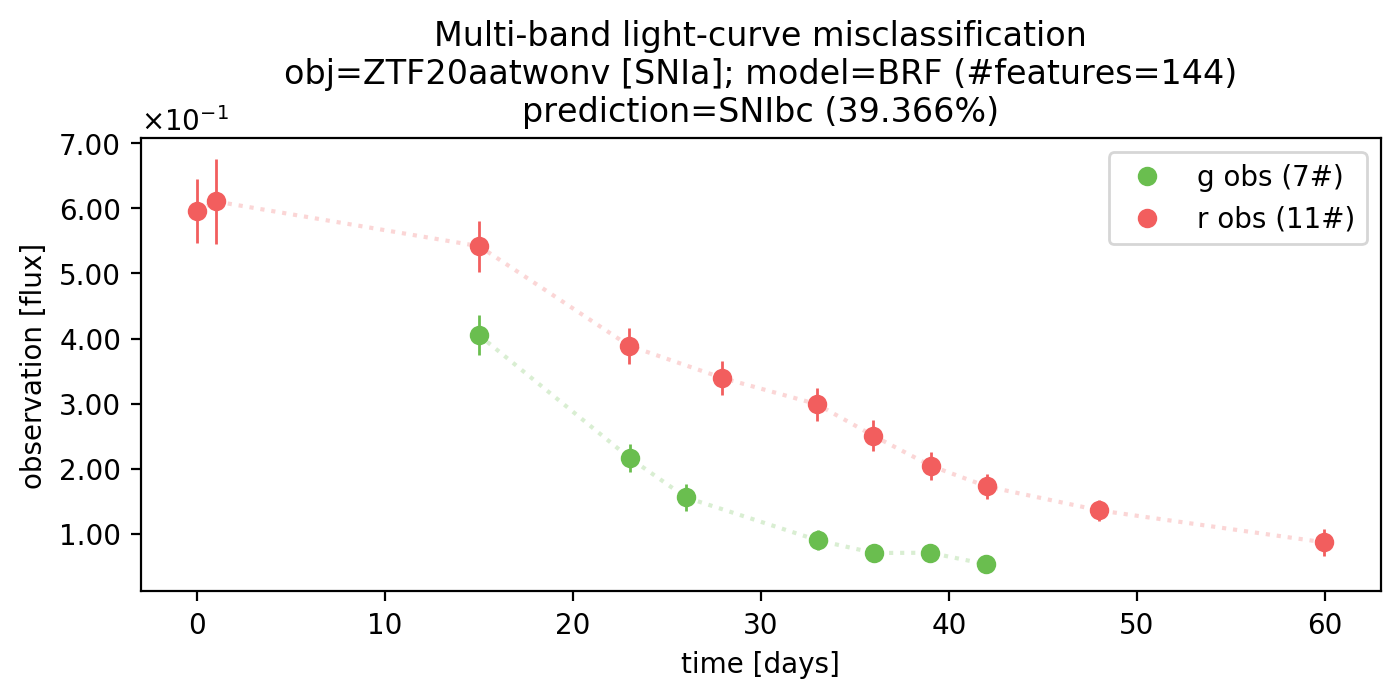

#obs=2.
#obs=8.
ZTF18abmjvpb


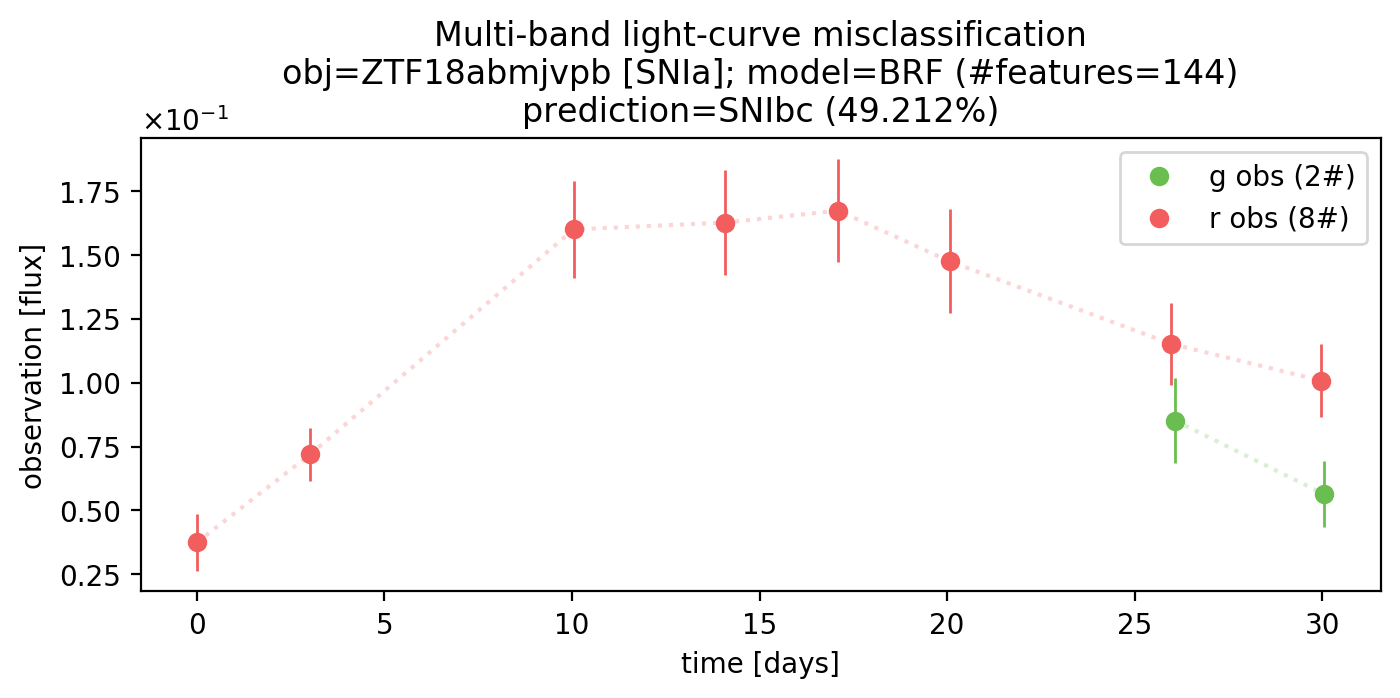

#obs=5.
#obs=11.
ZTF19abpxcaf


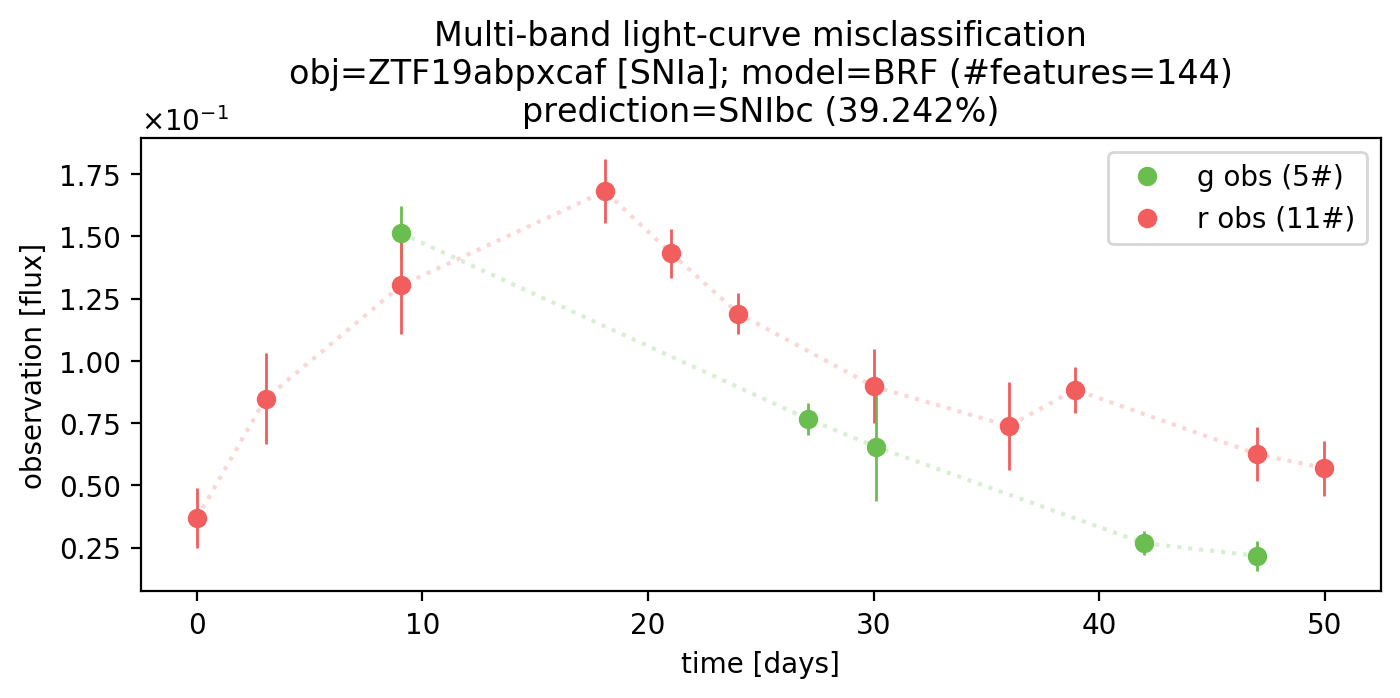

#obs=28.
#obs=9.
ZTF20aalkfui


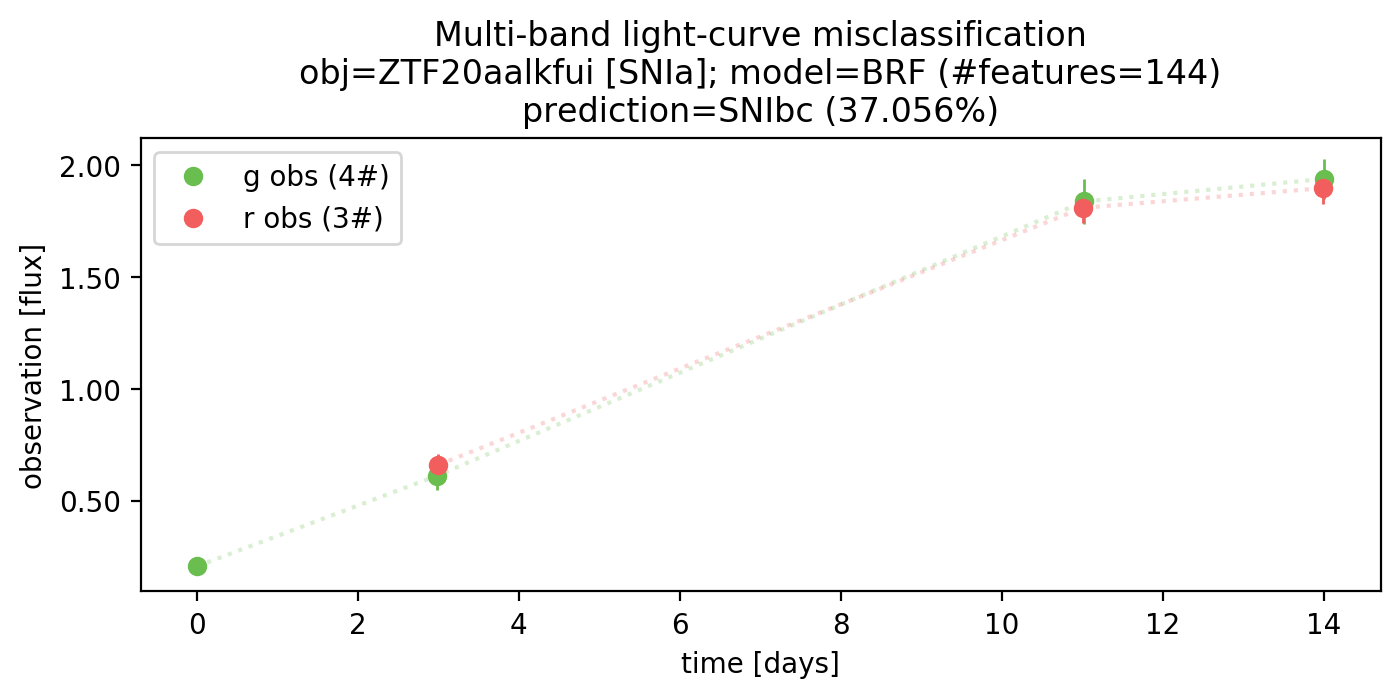

#obs=12.
#obs=15.
ZTF20aaszzez


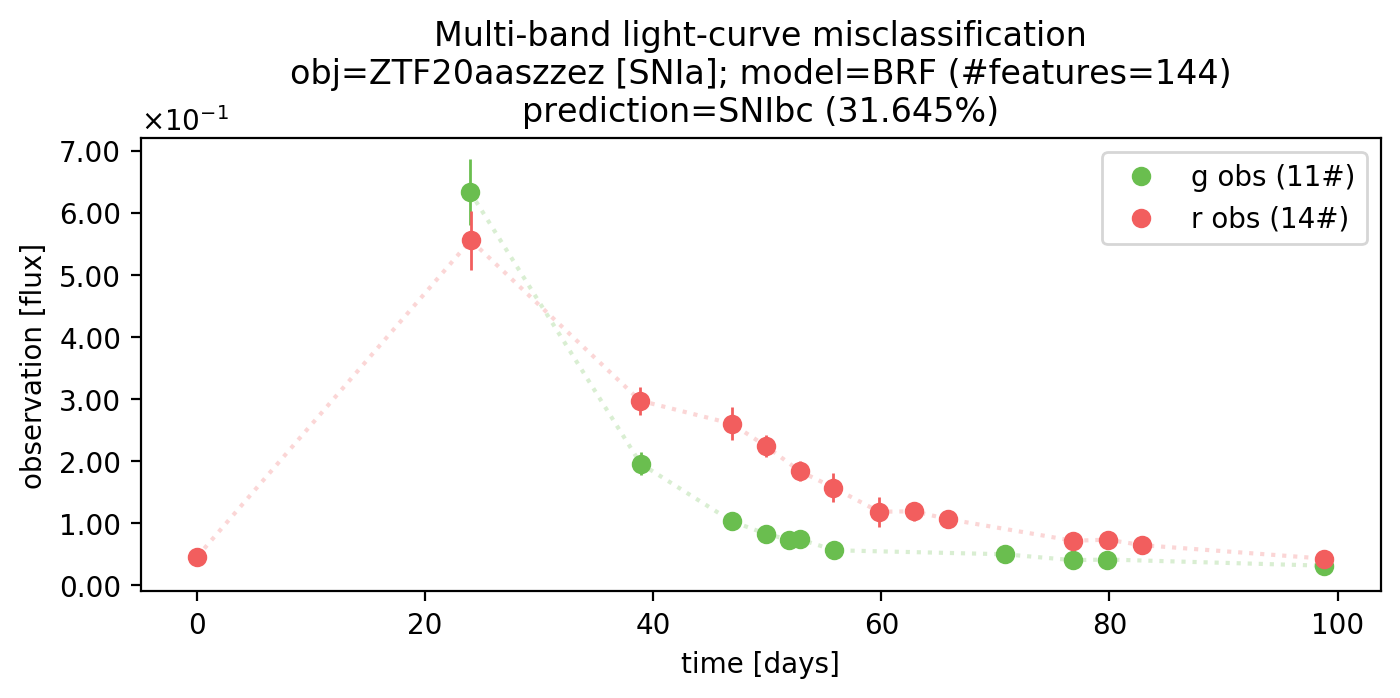

#obs=23.
#obs=25.
ZTF20aautzif


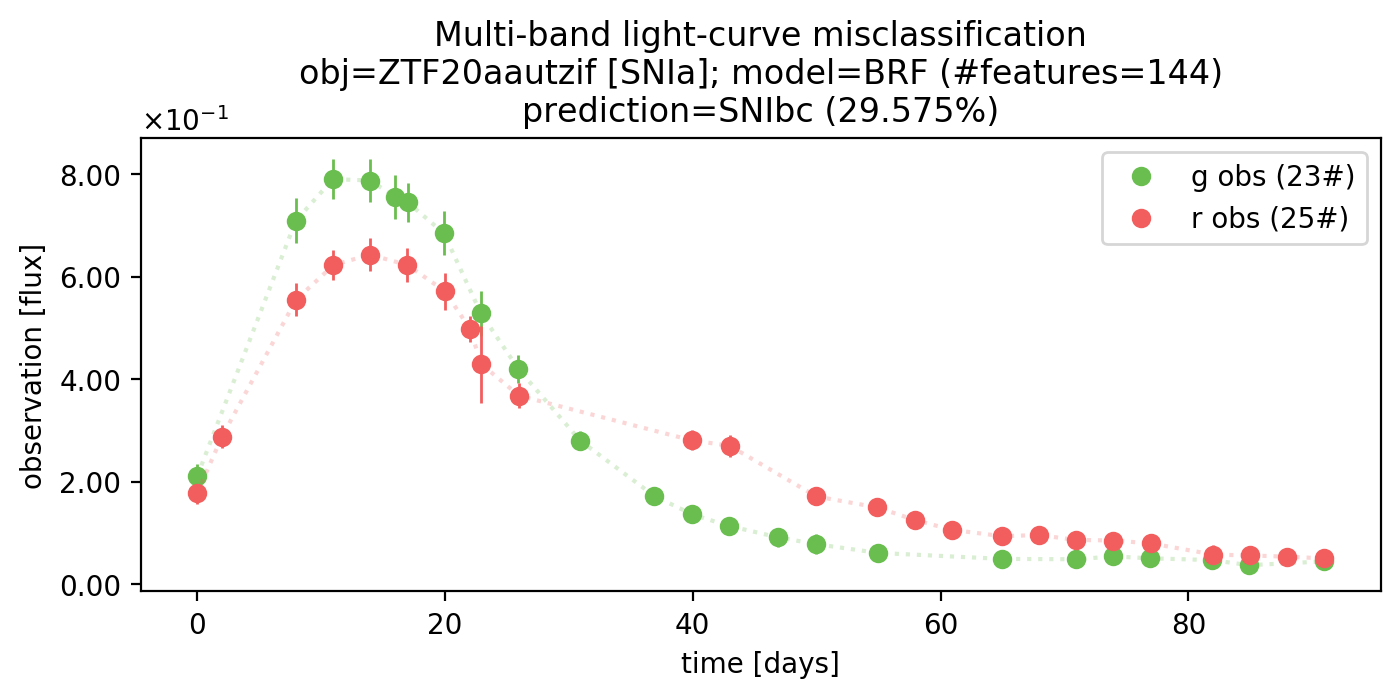

#obs=49.
#obs=50.
ZTF20abchhuw


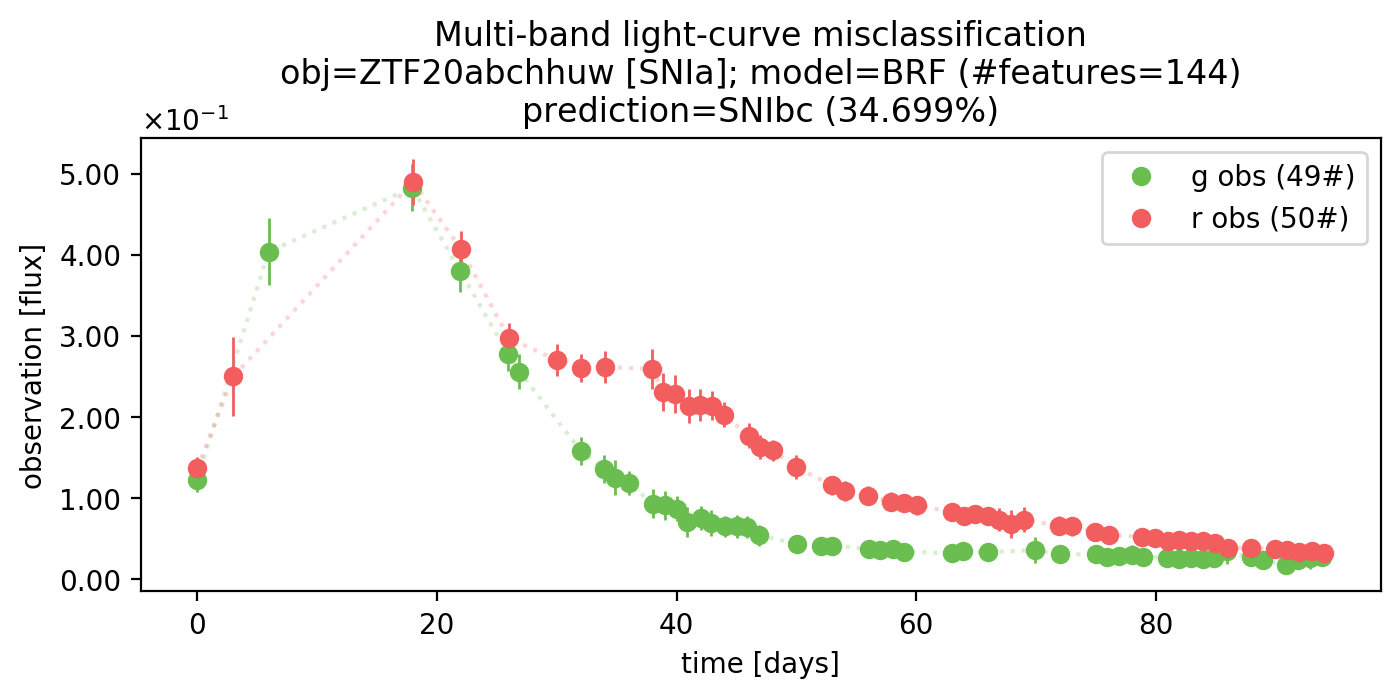

#obs=12.
#obs=18.
ZTF18adaslwa


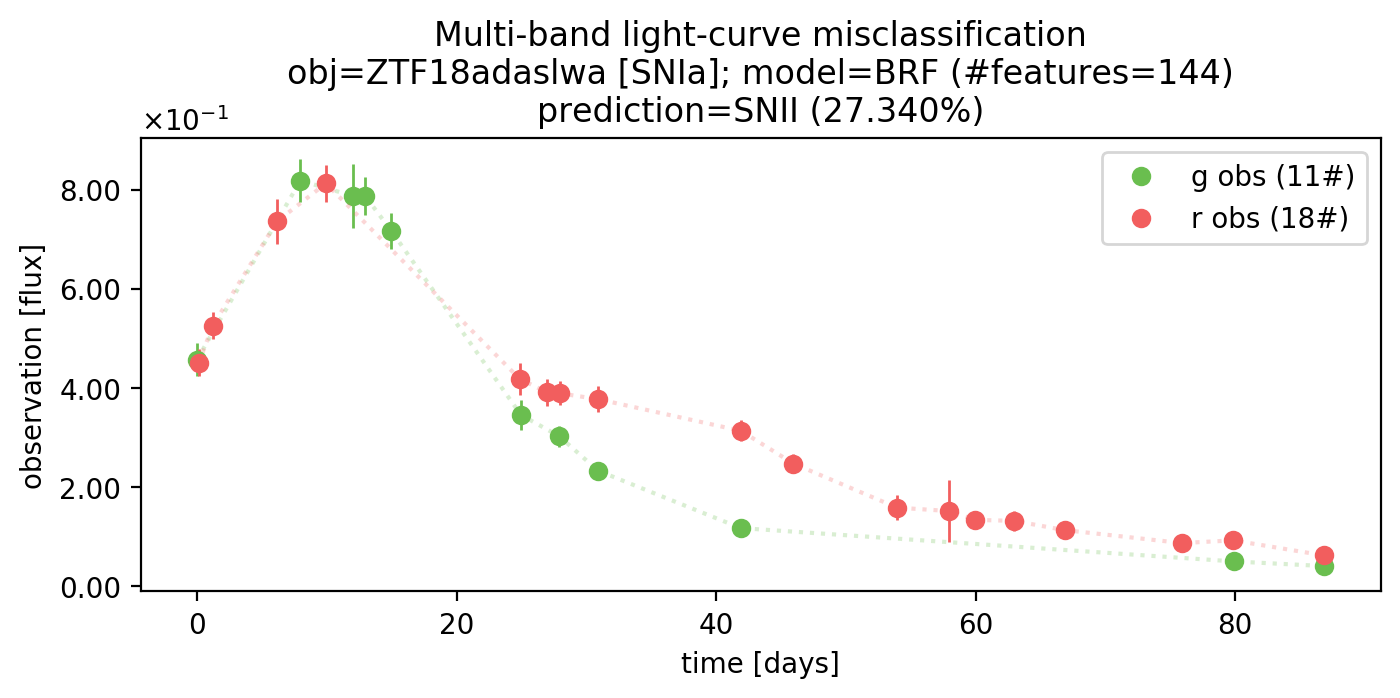

#obs=30.
#obs=28.
ZTF18abgmcmv


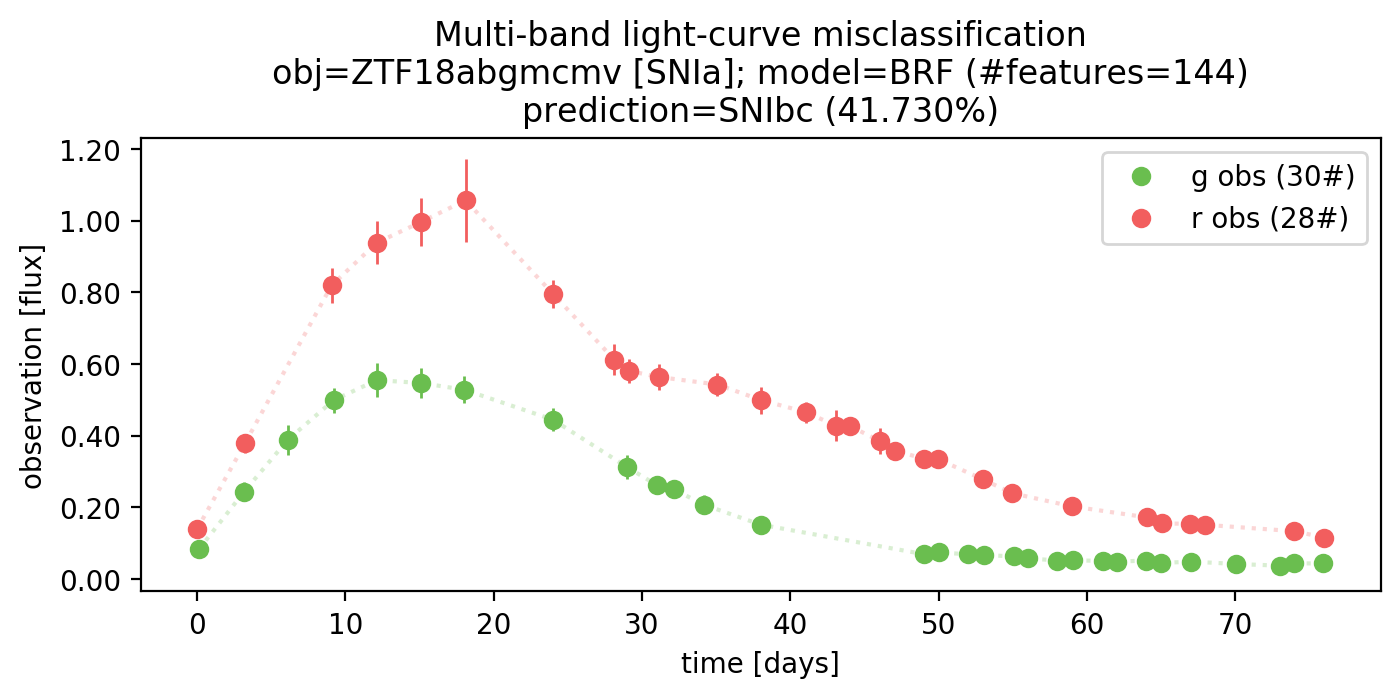

#obs=0.
#obs=8.
ZTF20aadyqdh


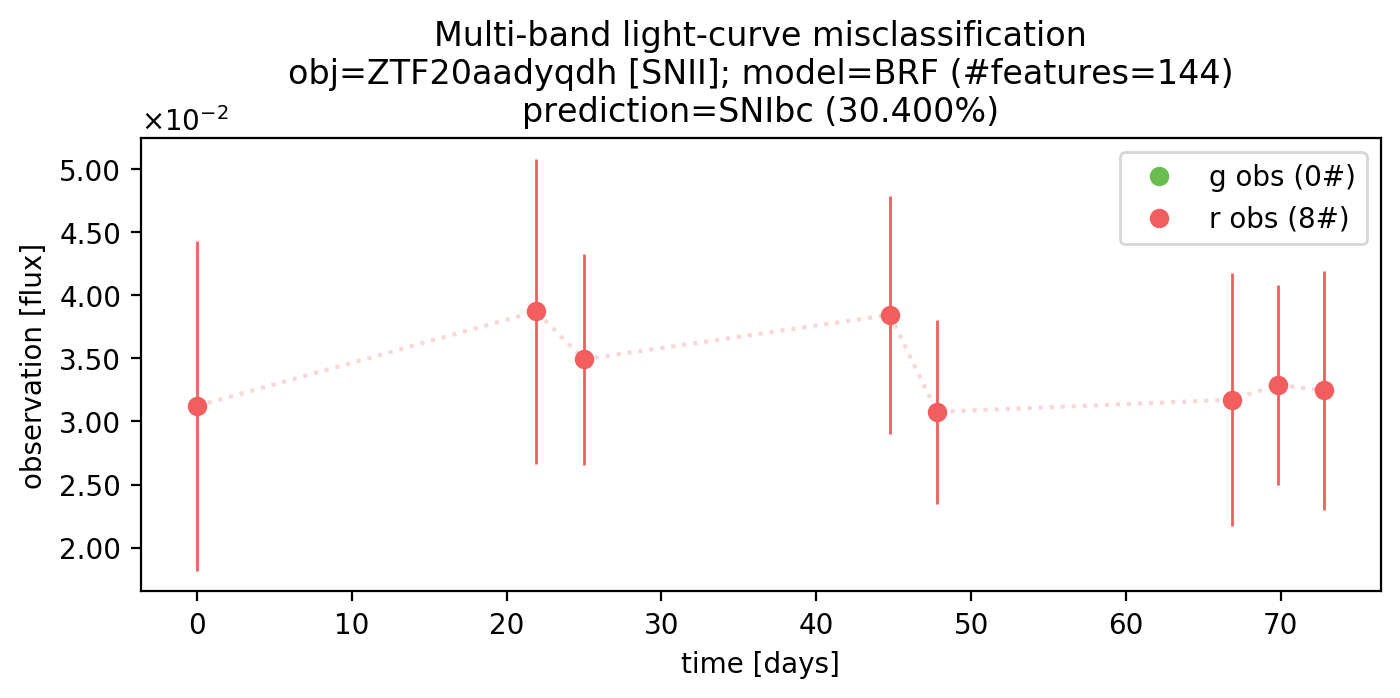

#obs=3.
#obs=6.
ZTF19aapdkza


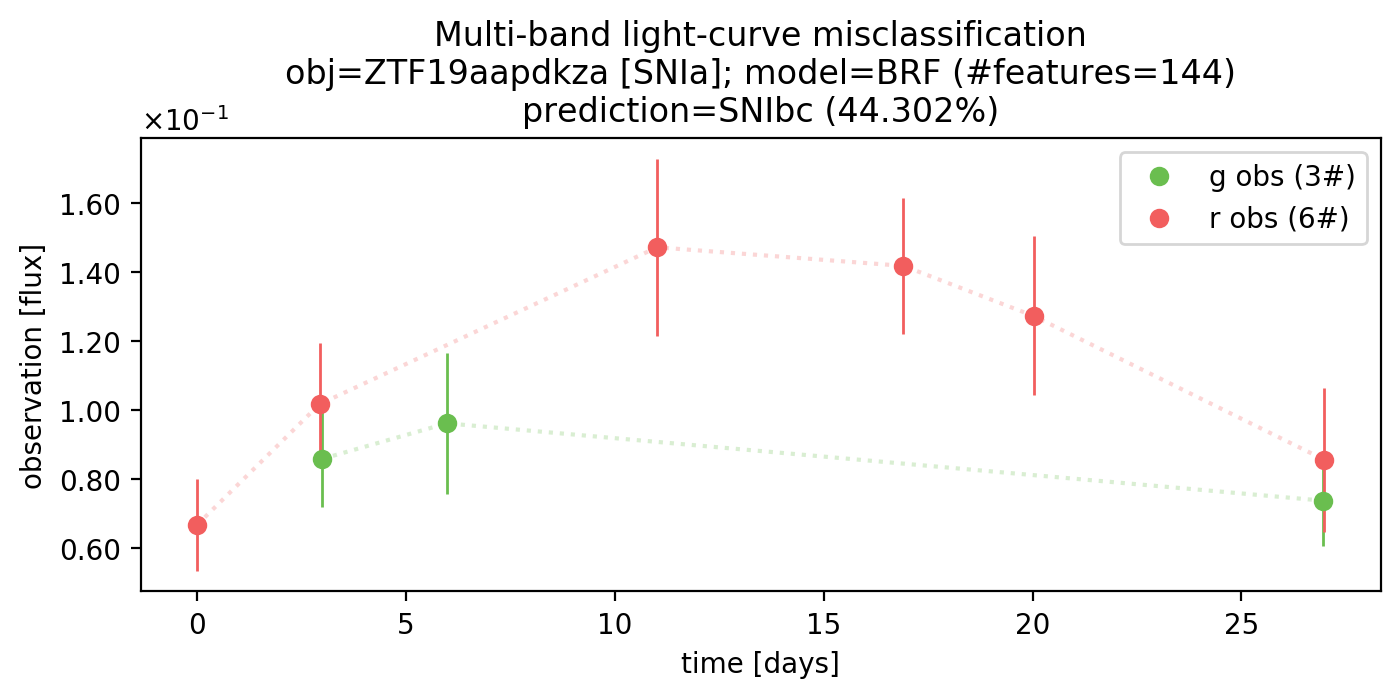

#obs=9.
#obs=5.
ZTF19abdmdow


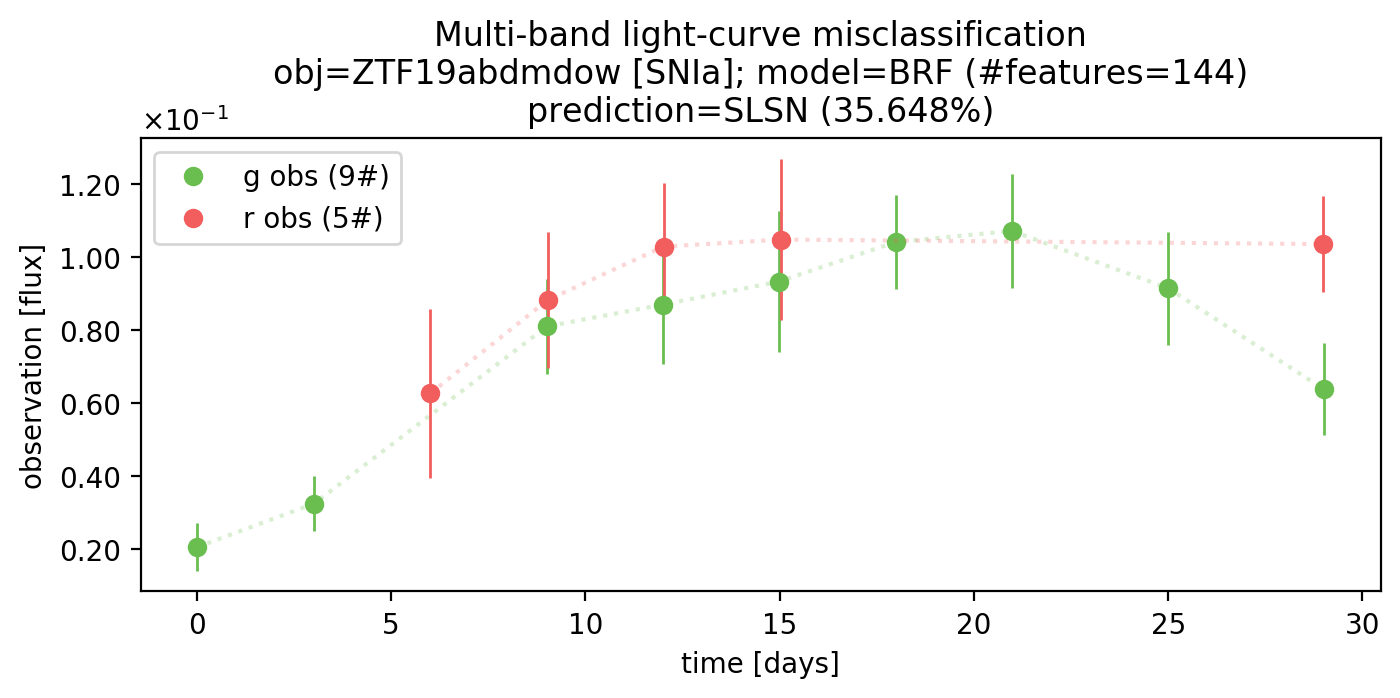

#obs=6.
#obs=9.
ZTF20abbhrrt


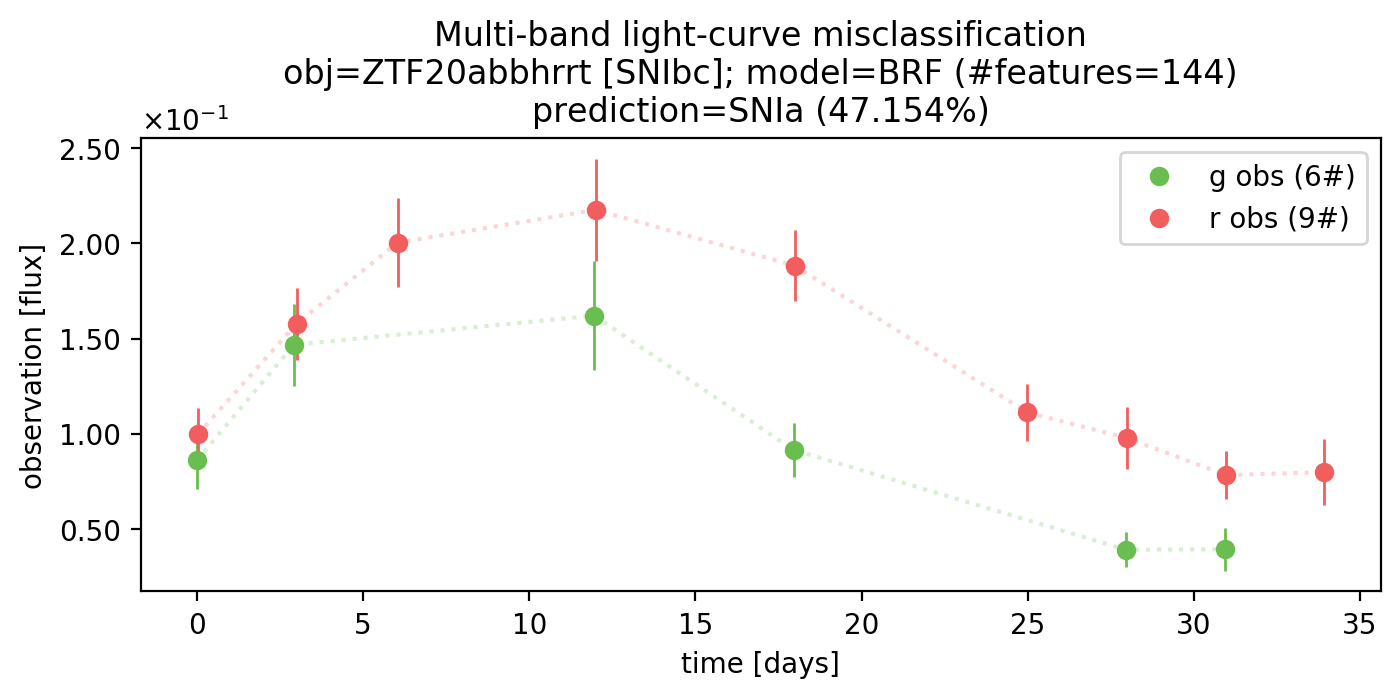

#obs=15.
#obs=19.
ZTF20aaurknv


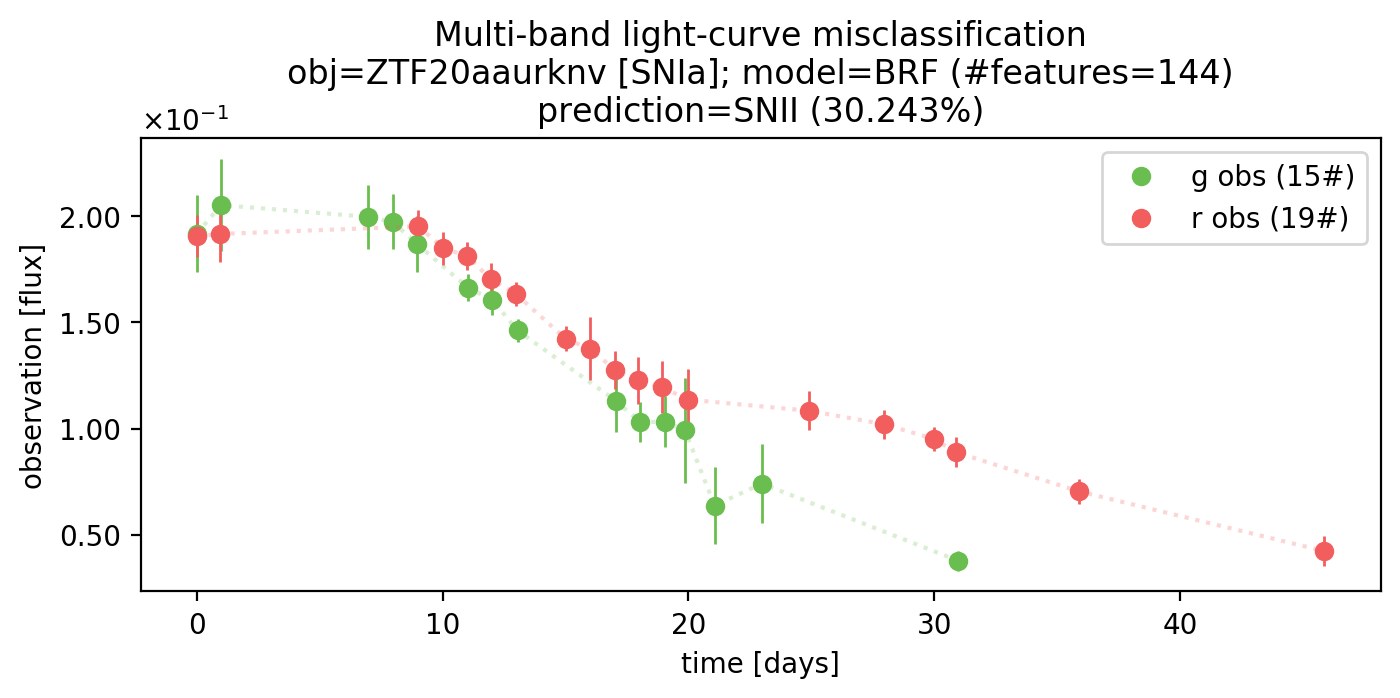

#obs=11.
#obs=13.
ZTF19aafmvdb


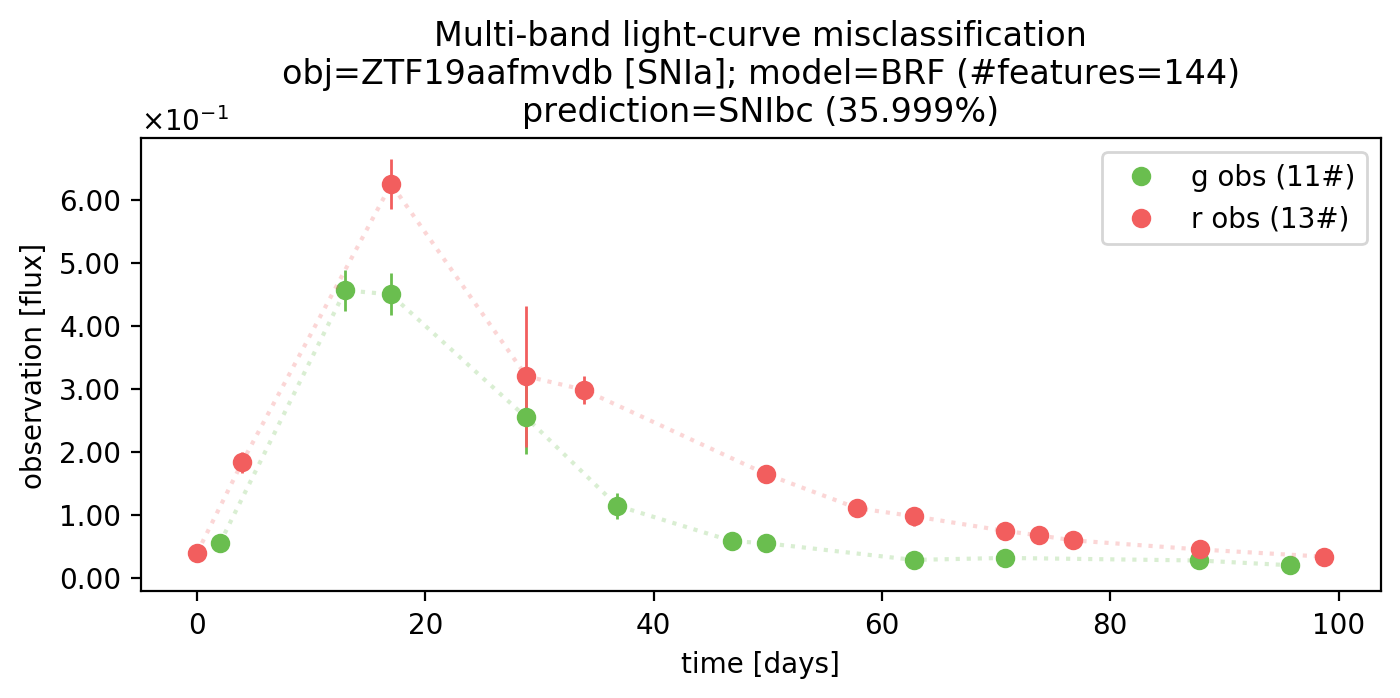

#obs=4.
#obs=7.
ZTF19acrwzqs


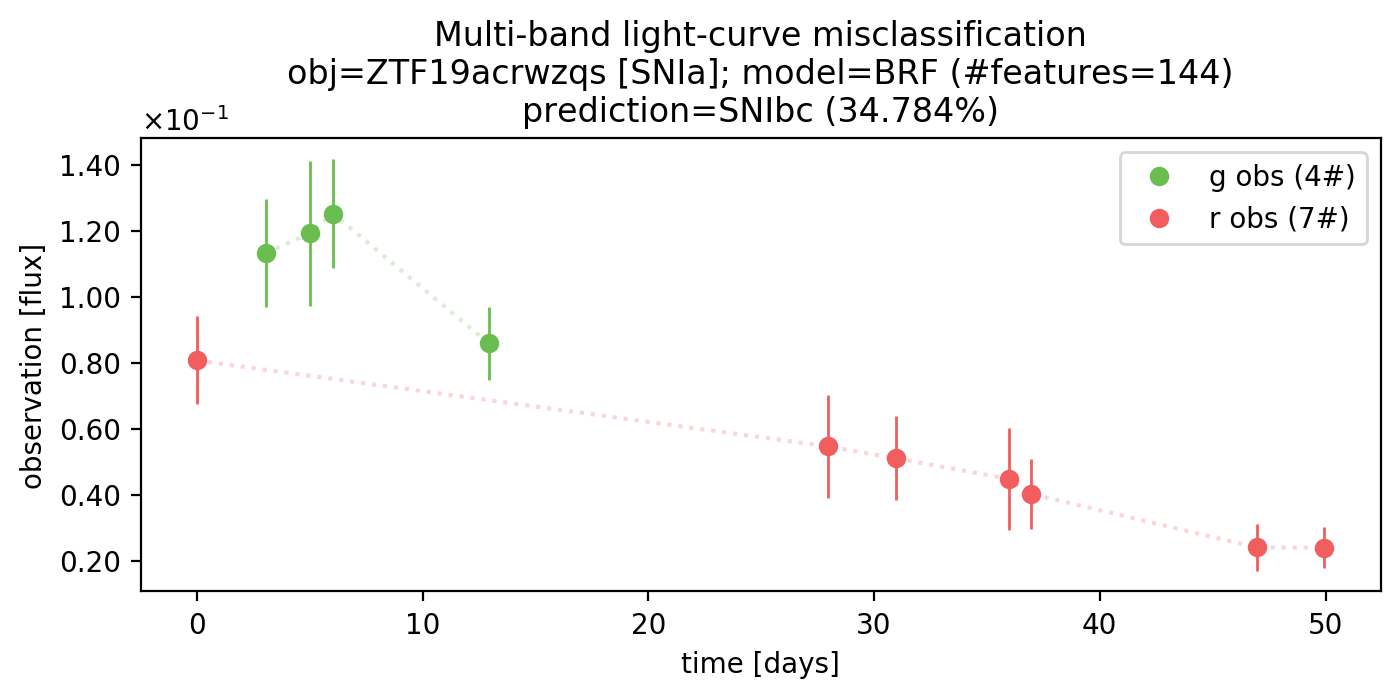

#obs=9.
#obs=13.
ZTF19abgprpq


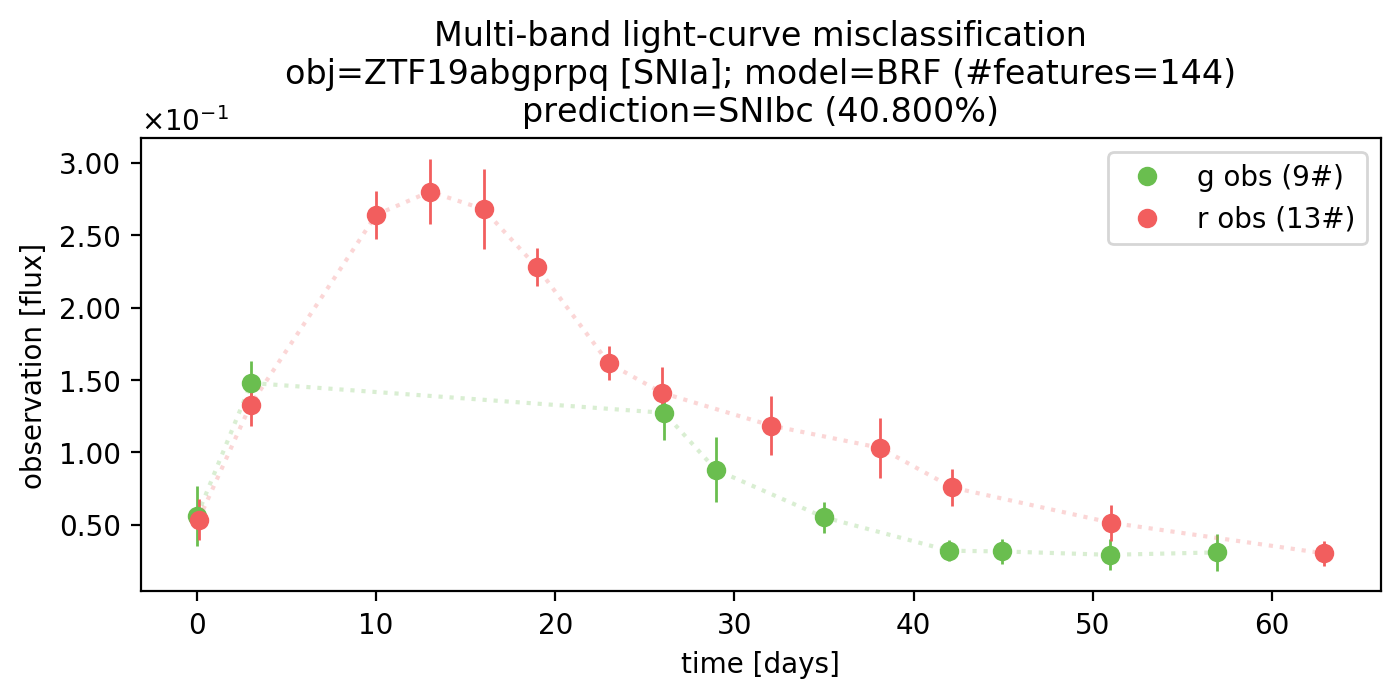

#obs=7.
#obs=13.
ZTF19aamqebl


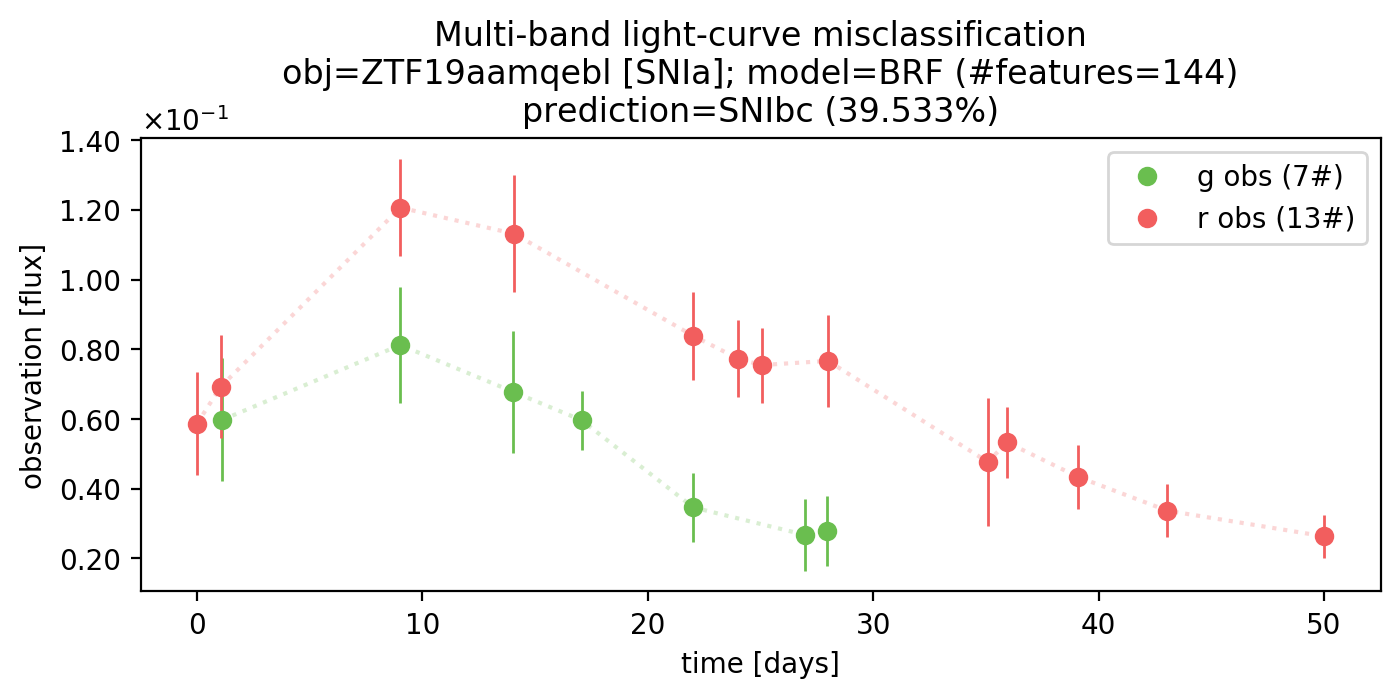

#obs=7.
#obs=10.
ZTF19aawblge


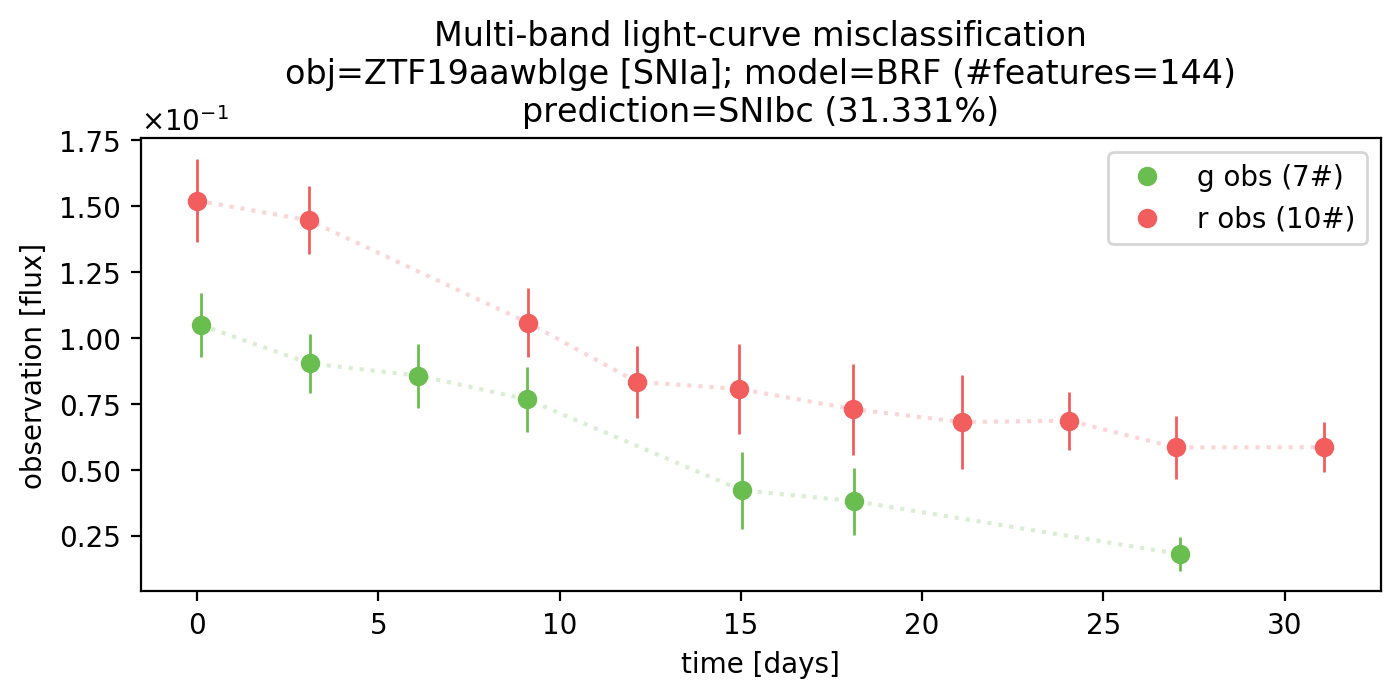

#obs=15.
#obs=16.
ZTF20aatpwaf


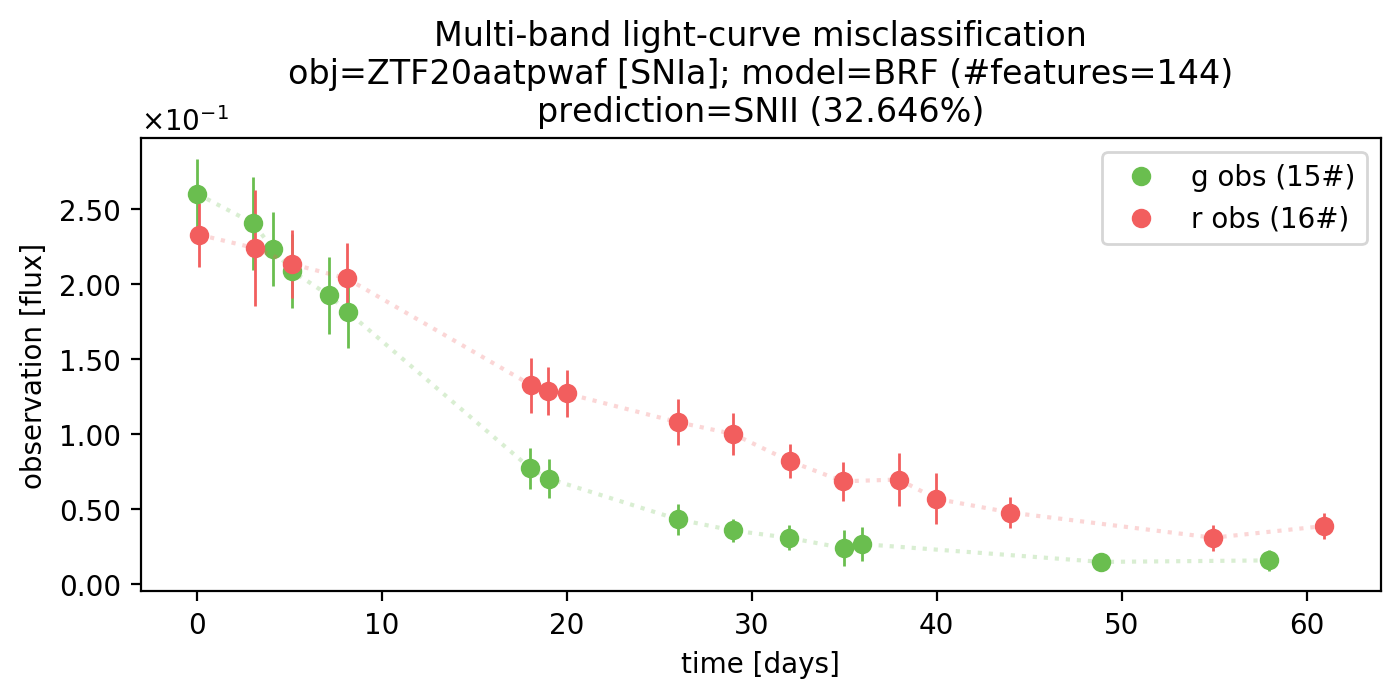

#obs=1.
#obs=7.
ZTF19adakmbh


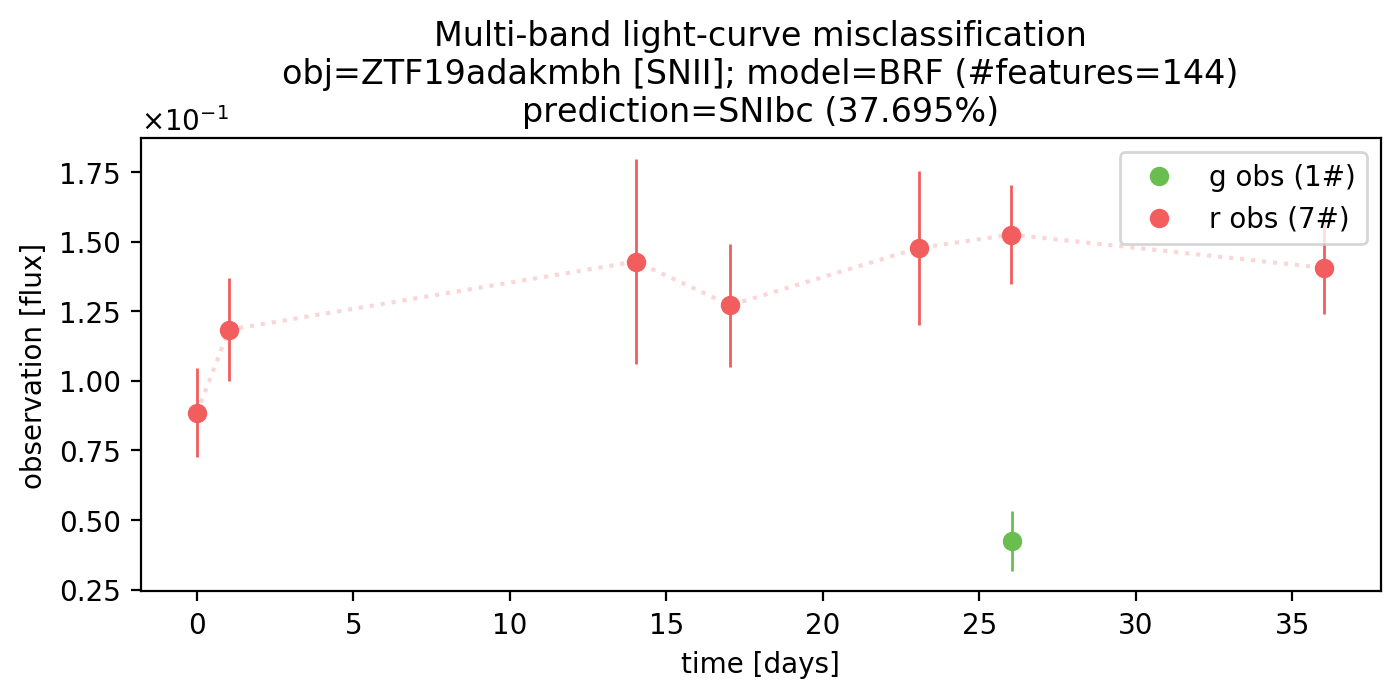

#obs=8.
#obs=14.
ZTF20aalcyih


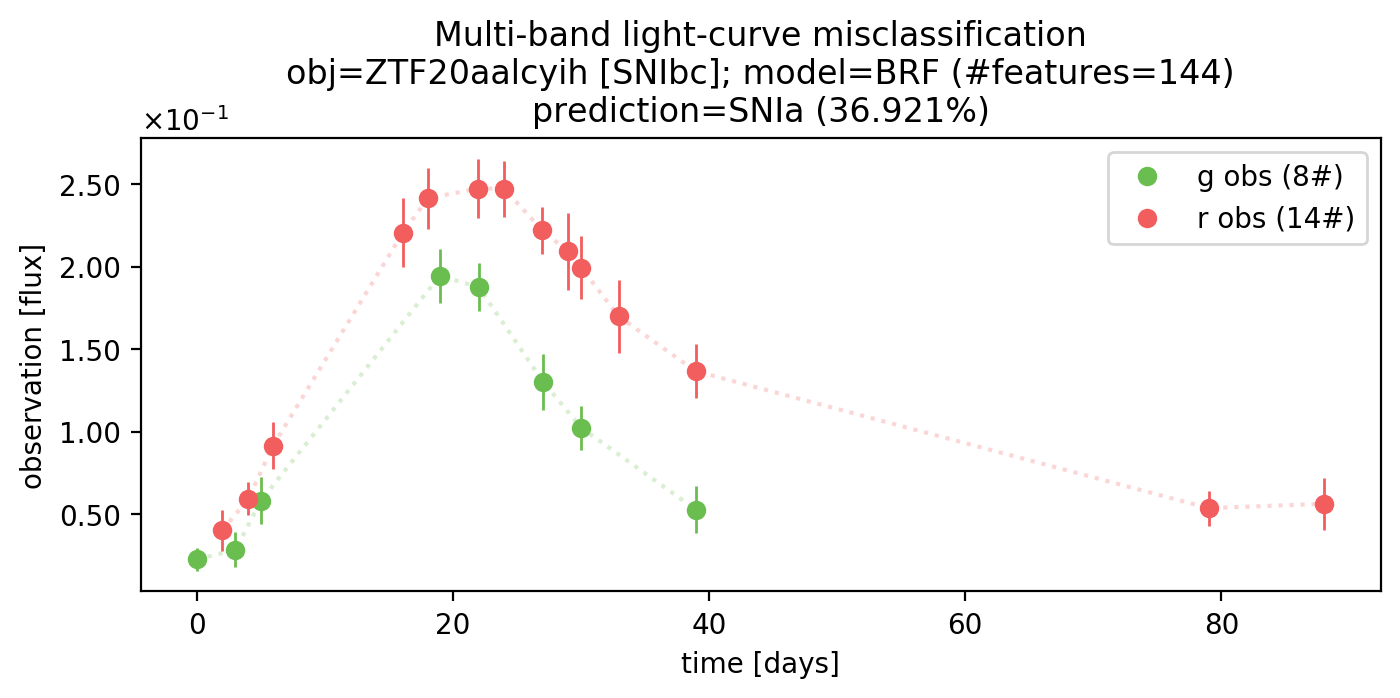

#obs=11.
#obs=13.
ZTF20aabcouv


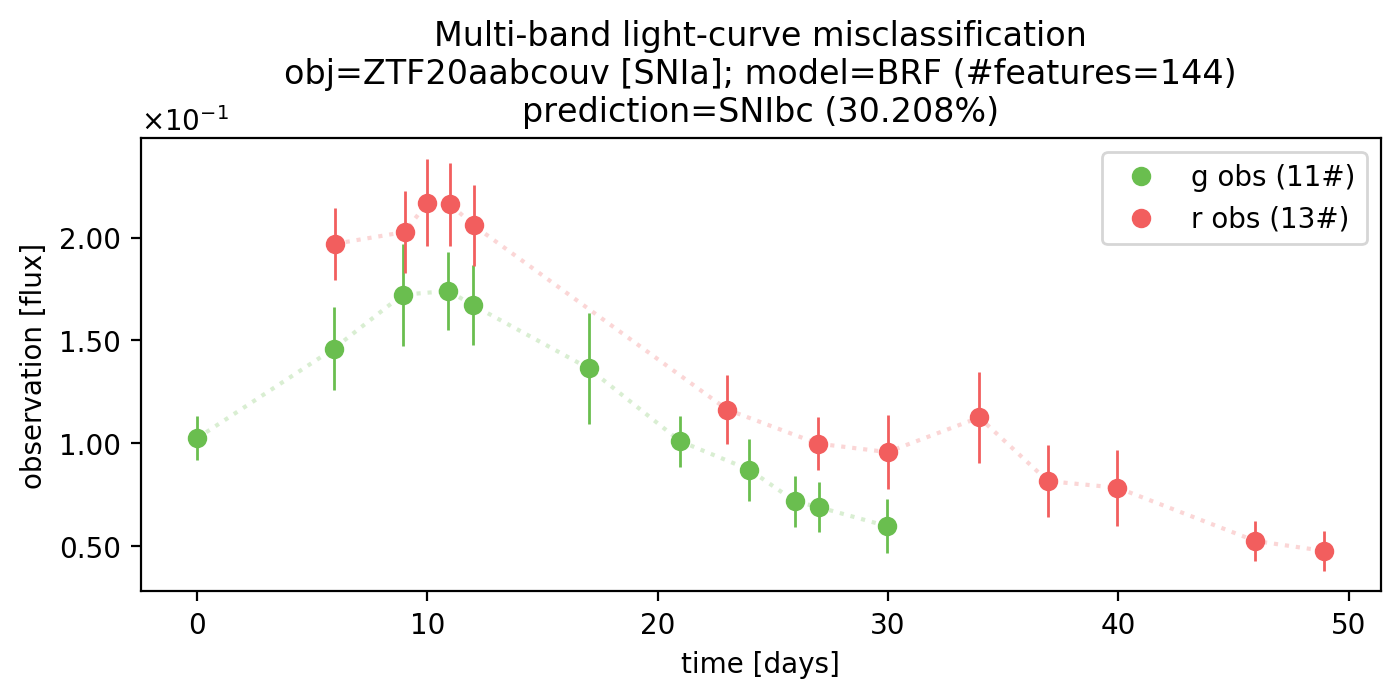

#obs=4.
#obs=7.
ZTF19aatzlmw


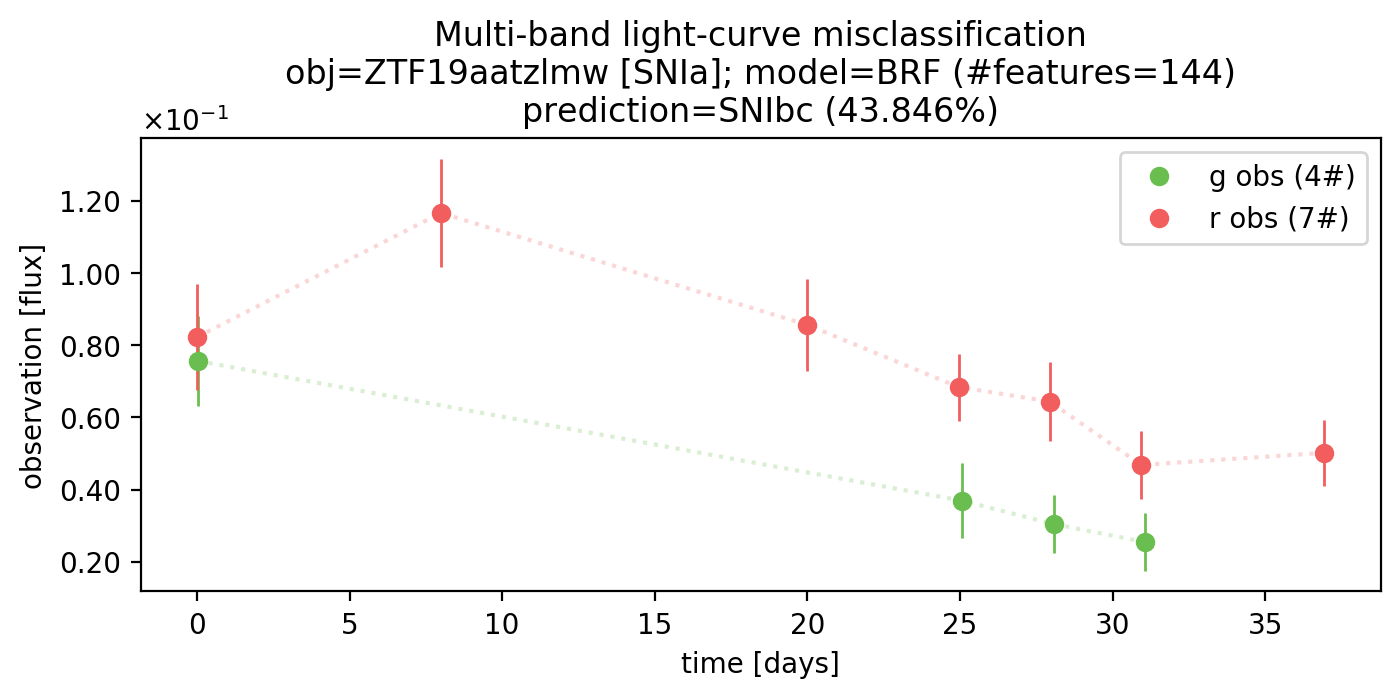

#obs=5.
#obs=9.
ZTF18acqsroy


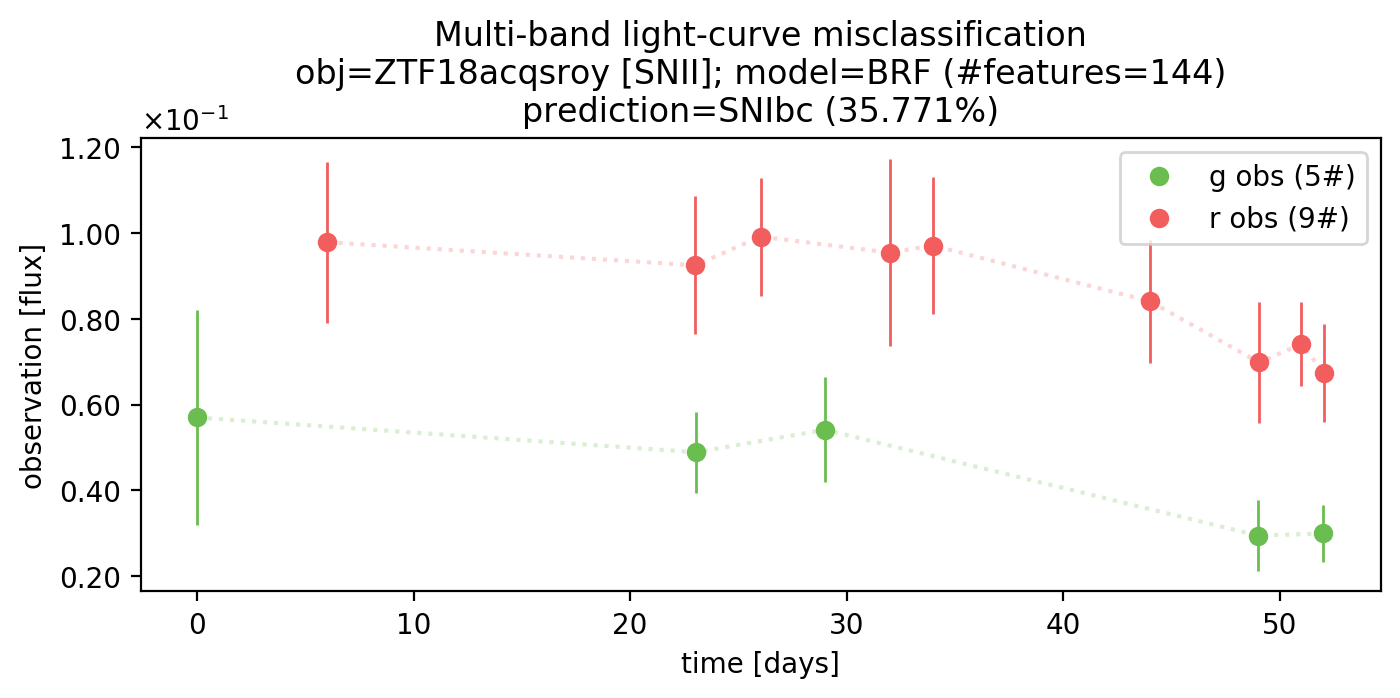

#obs=3.
#obs=11.
ZTF20aaxbvkt


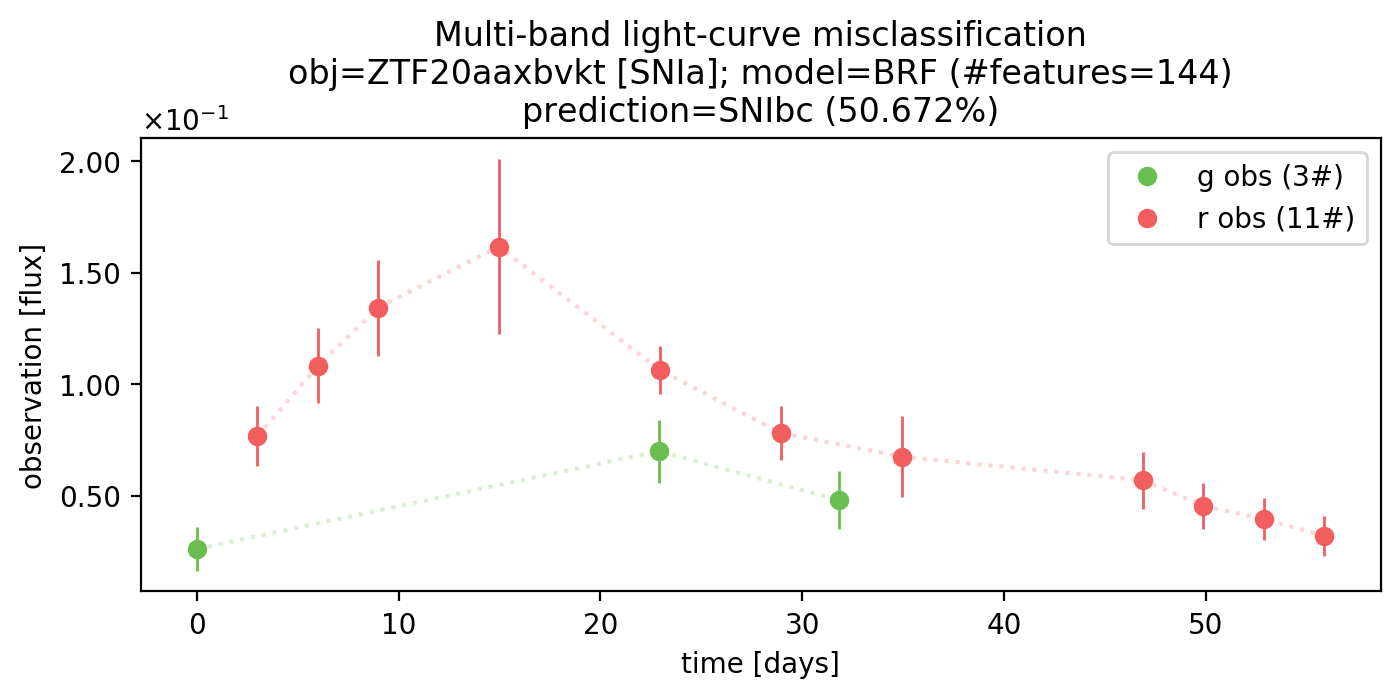

#obs=4.
#obs=6.
ZTF19abhdqlq


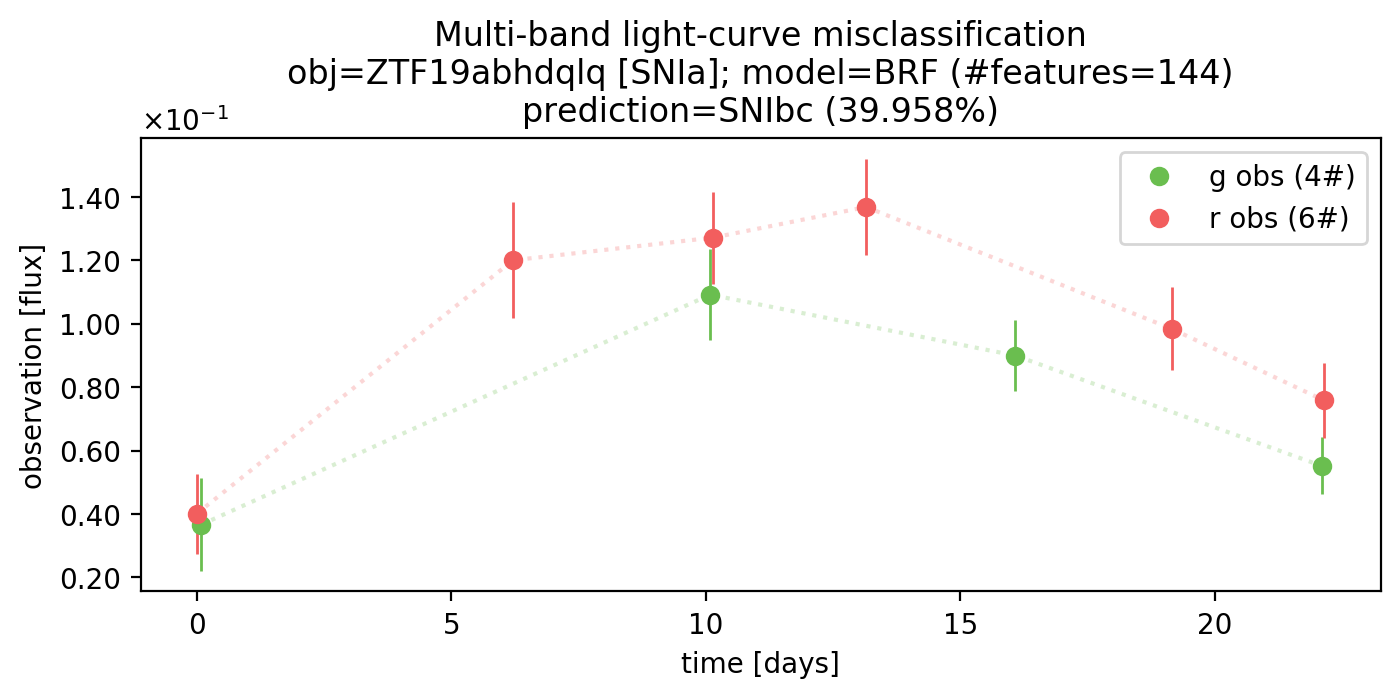

#obs=34.
#obs=20.
ZTF18aczeesl


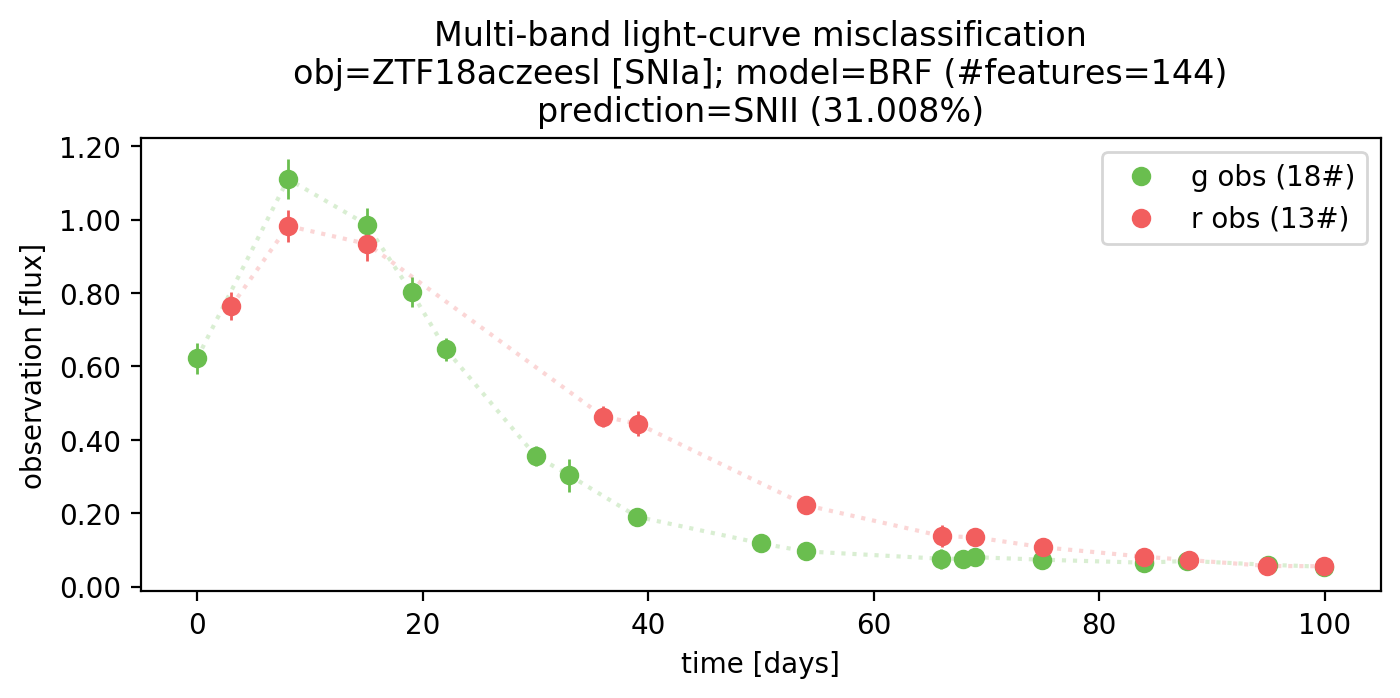

#obs=24.
#obs=23.
ZTF19aacivvy


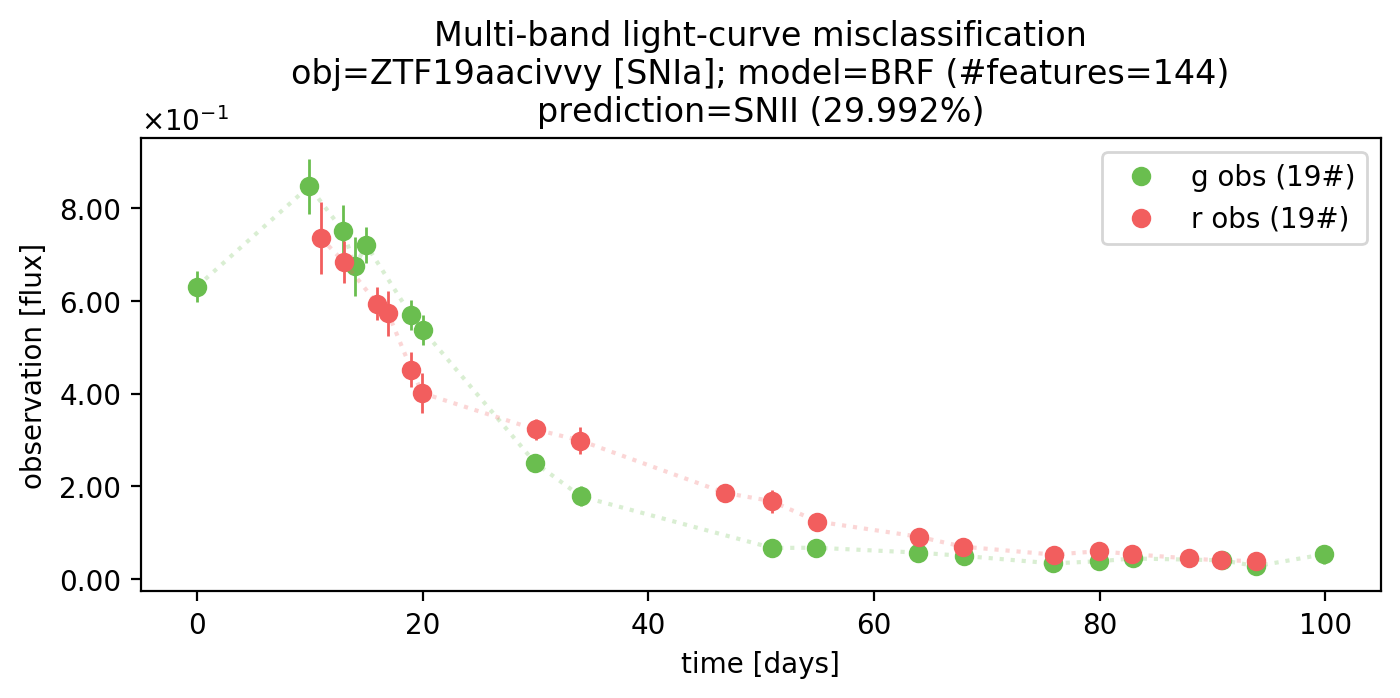

#obs=9.
#obs=9.
ZTF20aamdhut


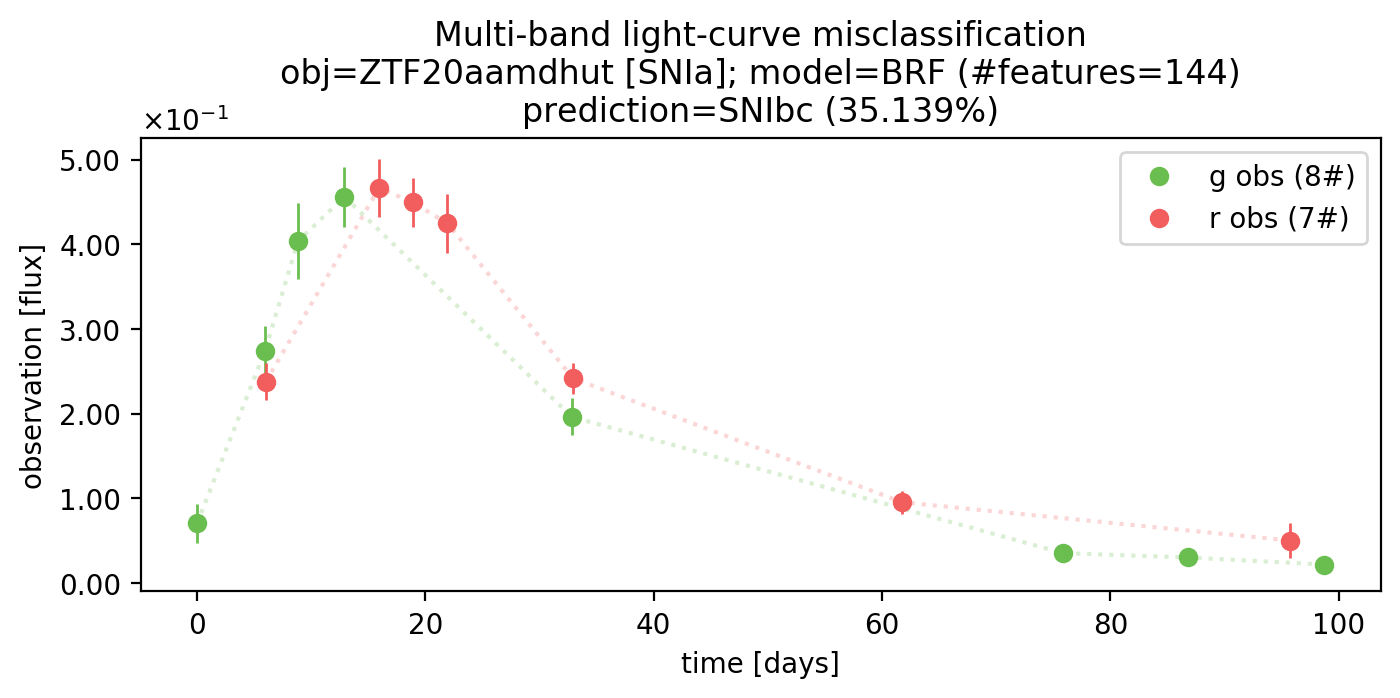

#obs=3.
#obs=8.
ZTF19acygbye


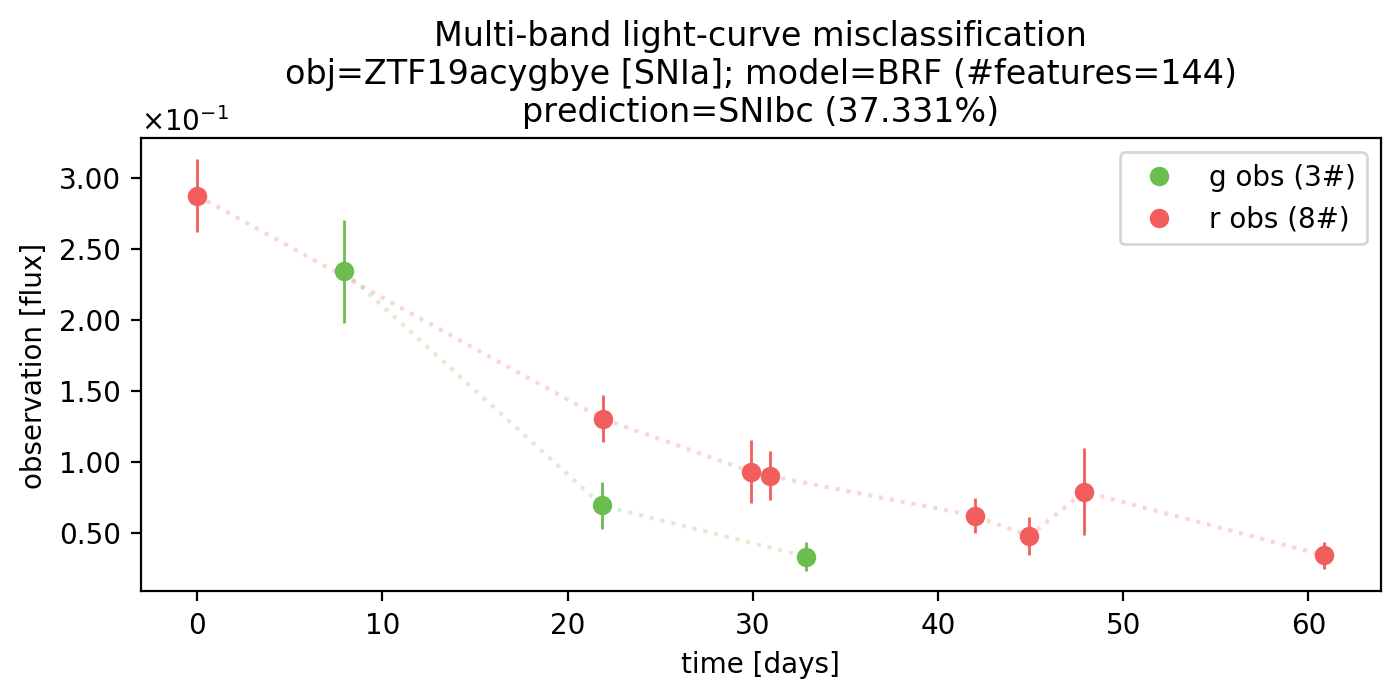

#obs=51.
#obs=51.
ZTF19abvhduf


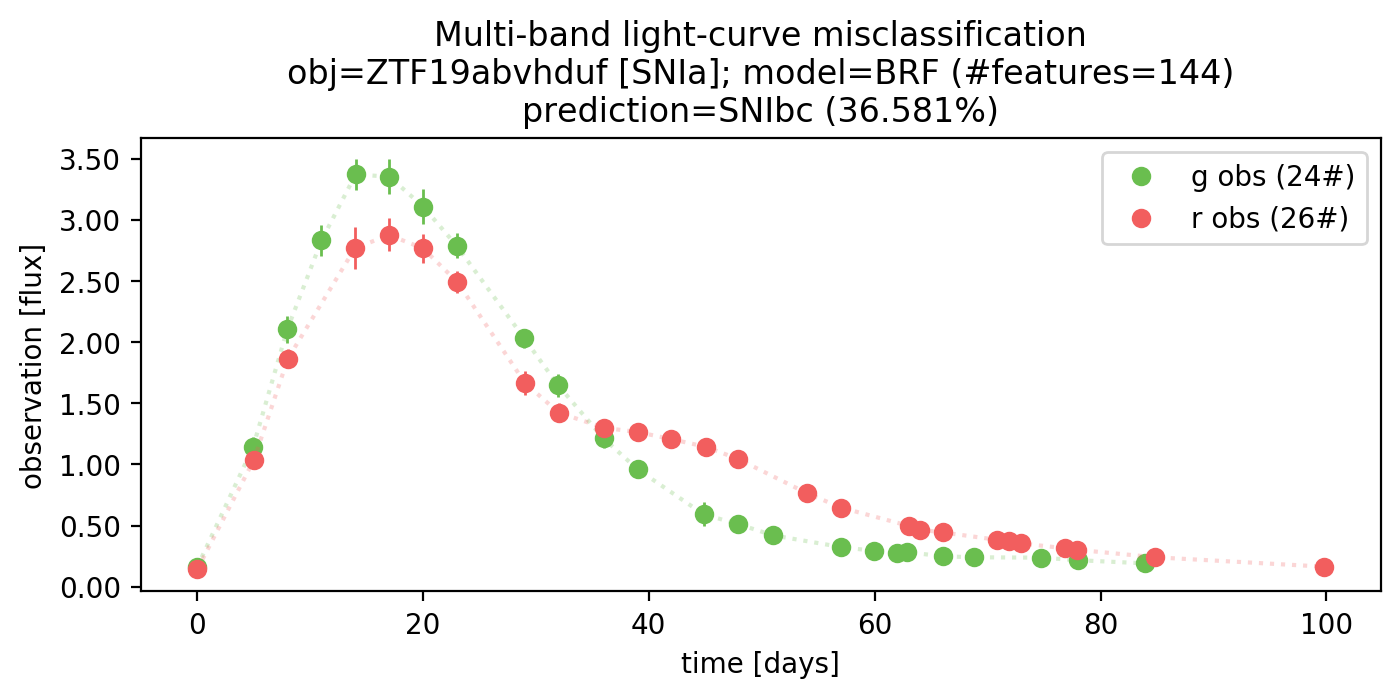

#obs=23.
#obs=19.
ZTF19aarnqzw


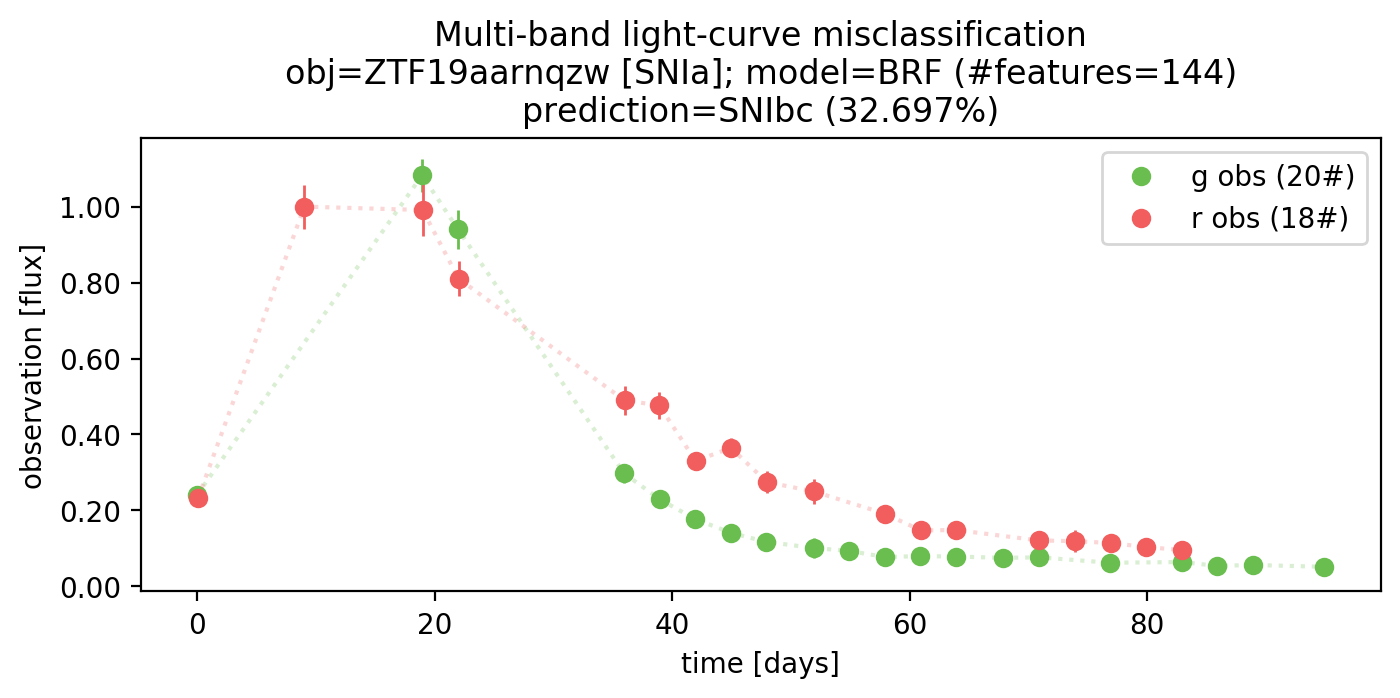

#obs=4.
#obs=6.
ZTF20aaewban


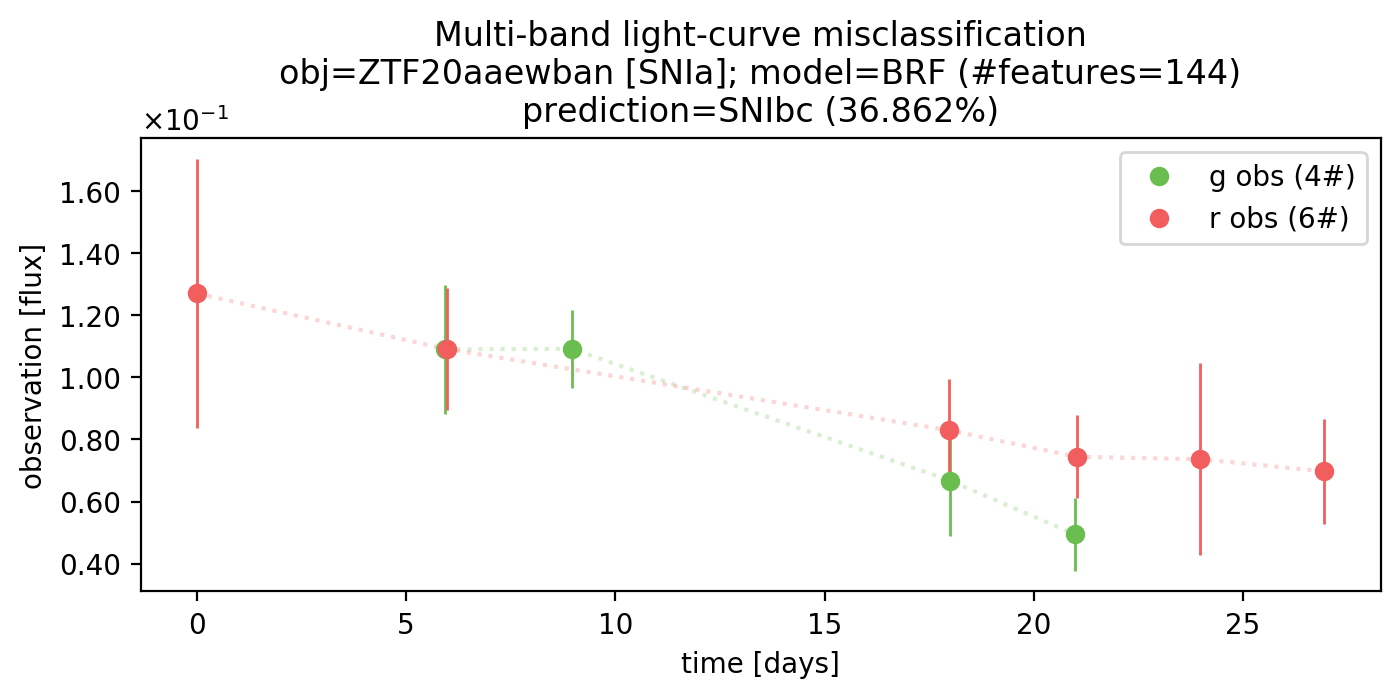

#obs=5.
#obs=7.
ZTF19abjrkqn


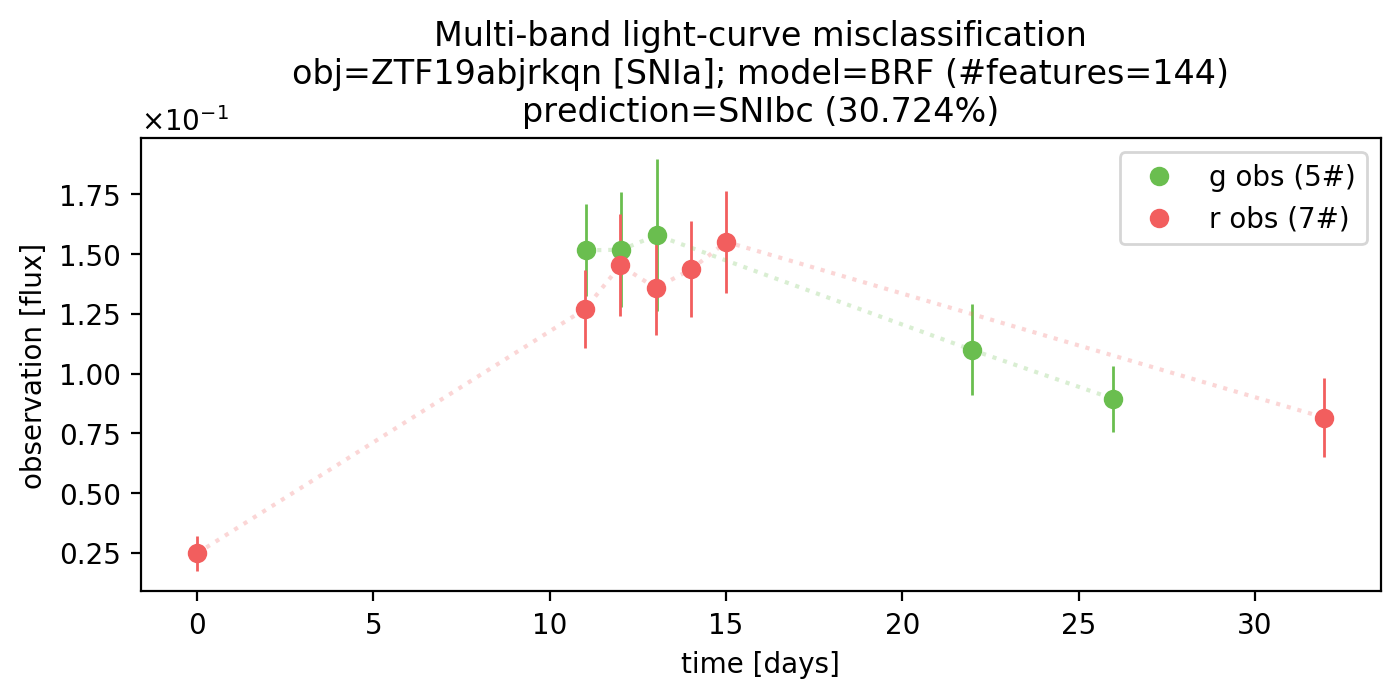

#obs=4.
#obs=11.
ZTF18acrlmvt


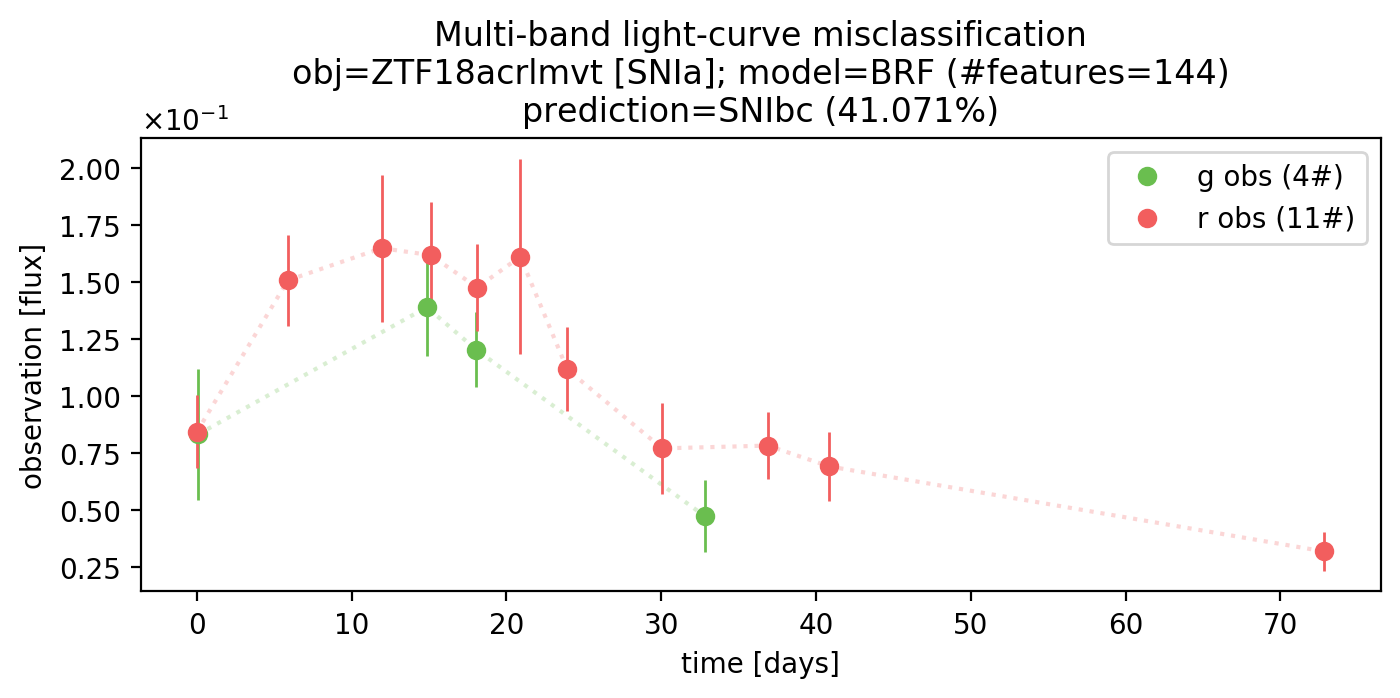

#obs=5.
#obs=6.
ZTF18acbwtmf


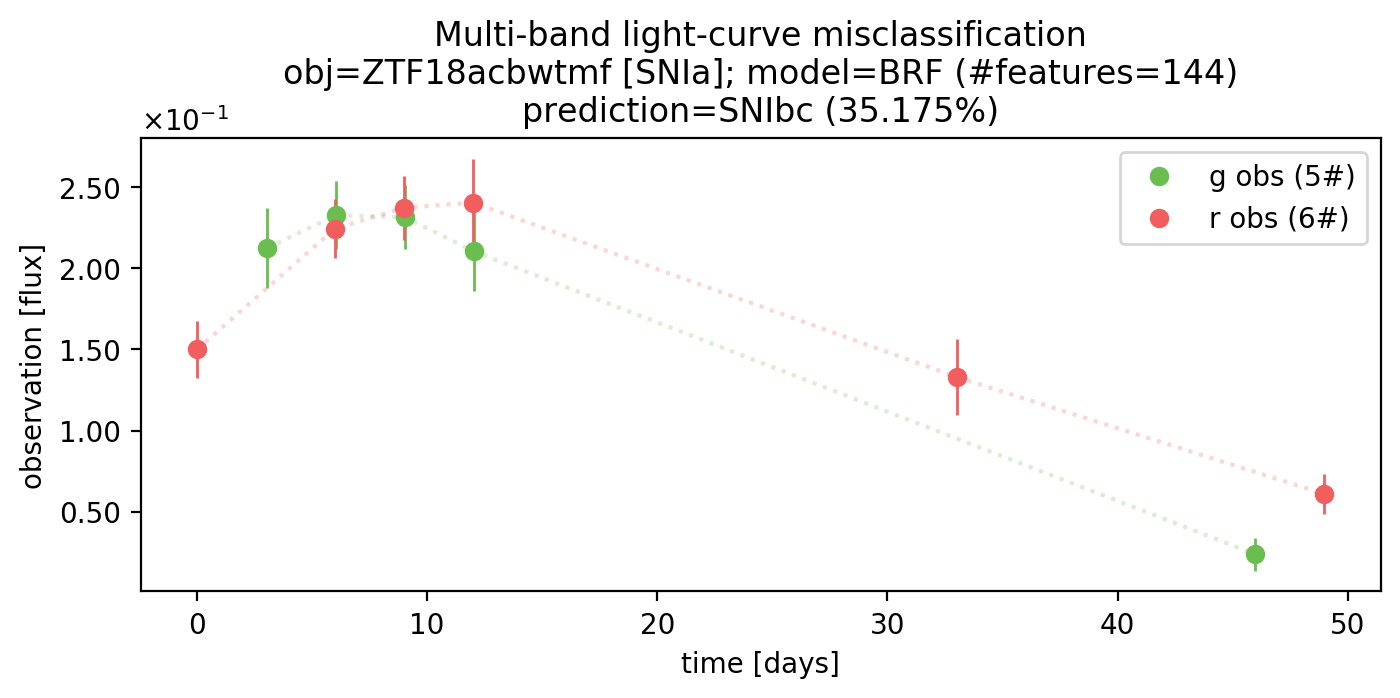

#obs=11.
#obs=7.
ZTF19abfsxpw


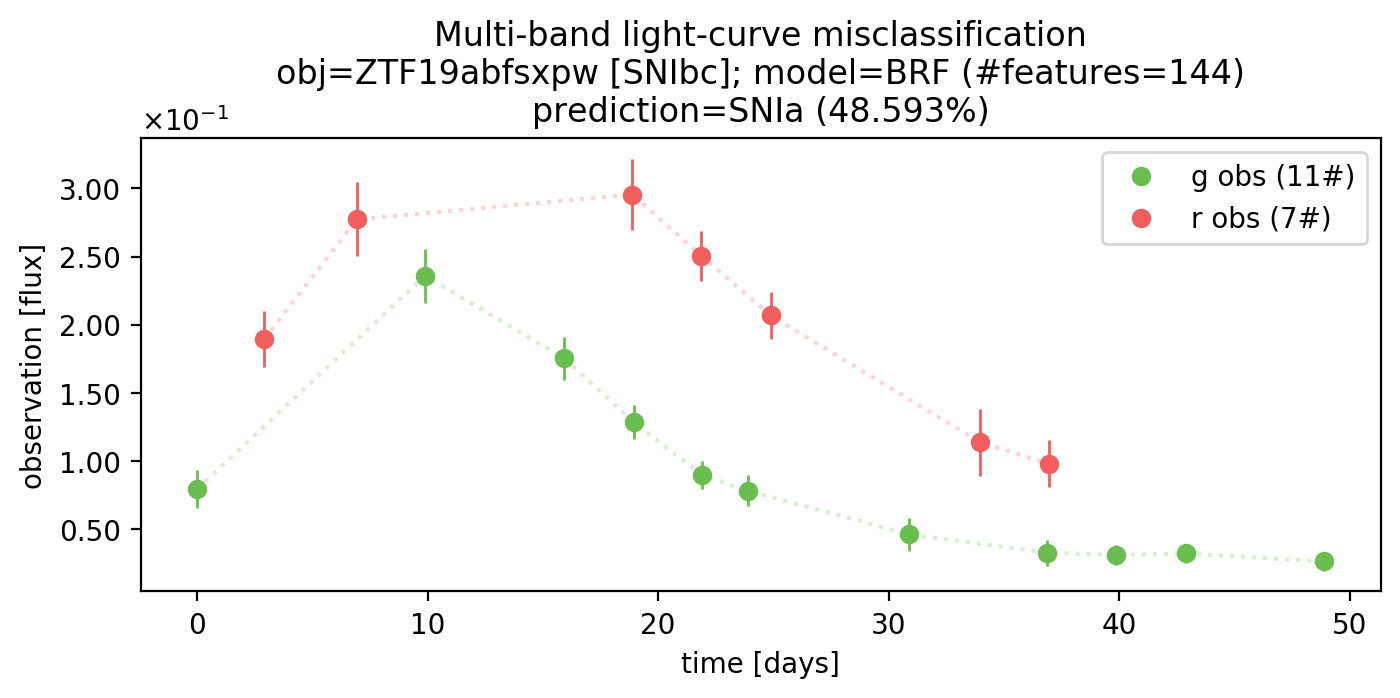

#obs=24.
#obs=31.
ZTF19abcejsg


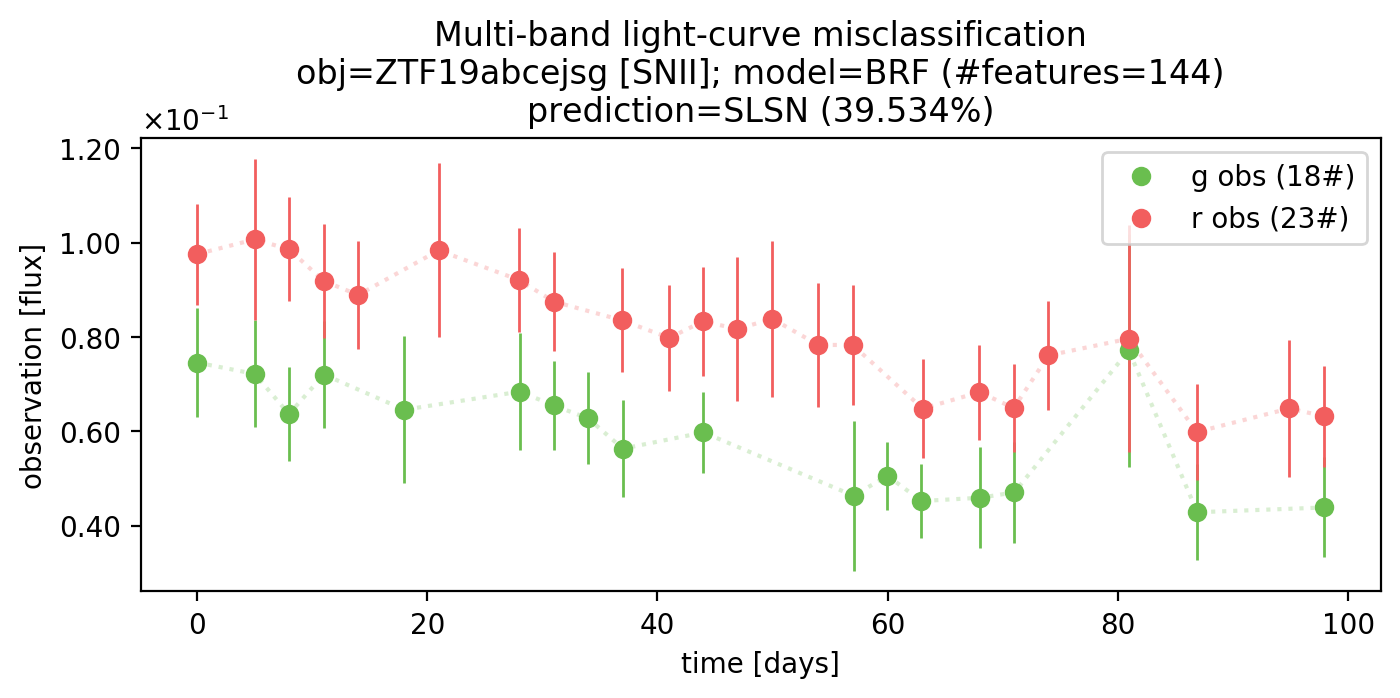

#obs=2.
#obs=9.
ZTF18acspjqd


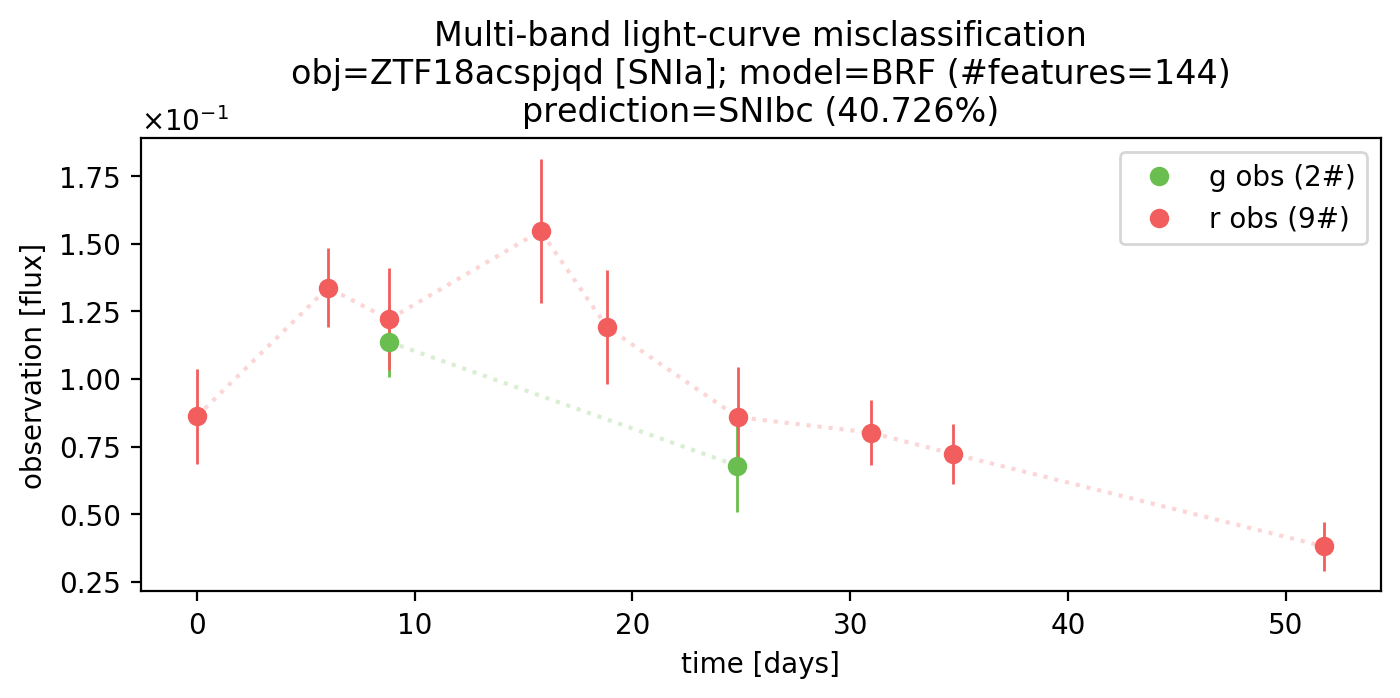

In [6]:
%load_ext autoreload
%autoreload 2
from copy import copy, deepcopy
from lchandler.plots.lc import plot_lightcurve
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from fuzzytools.matplotlib.utils import save_fig

FIGSIZE = (8, 3)
DPI = 200

class ScalarFormatterClass(ScalarFormatter):
    def _set_format(self):
        self.format = "%1.2f"

model_name = f'BRF (#features=144)'

for miss_obj_id in sorted(list(set(brf_miss_obj_ids+deep_miss_obj_ids))):
    #if miss_obj_id in brf_miss_obj_ids and miss_obj_id in deep_miss_obj_ids: # both
    if miss_obj_id in brf_miss_obj_ids and not miss_obj_id in deep_miss_obj_ids: # only brf
        fig, ax = plt.subplots(1, 1, figsize=FIGSIZE, dpi=DPI)
        lcobj = lcdataset['raw'][miss_obj_id]
        for b in lcobj.bands:
            print(f'#obs={len(lcobj.get_b(b))}.')
            plot_lightcurve(ax, lcobj, b, label=f'{b} obs',
                max_day=thday,
                )
        ax.legend()
        d = brf_miss_objs_df.loc[[miss_obj_id]].to_dict(orient='index')[miss_obj_id]
        title = ''
        title += f'Multi-band light-curve misclassification\n'
        c = d['c'].replace('*', '')
        obj_y_pred_c = d['obj_y_pred_c'].replace('*', '')
        title += f'obj={miss_obj_id} [{c}]; model={model_name}\n'
        title += f'prediction={obj_y_pred_c} ({d["obj_y_pred_p"]*100:.3f}%)\n'
        ax.set_title(title[:-1])
        ax.set_xlabel('time [days]')
        ax.set_ylabel('observation [flux]')
        ax.grid(alpha=.0)
        yScalarFormatter = ScalarFormatterClass(useMathText=True)
        yScalarFormatter.set_powerlimits((0, 0))
        ax.yaxis.set_major_formatter(yScalarFormatter)
        print(miss_obj_id)
        image_save_filedir = f'temp/missclassification_{miss_obj_id}.pdf'
        save_fig(fig, image_save_filedir, closes_fig=False)
        plt.show()